# EXPLORED EDA

In [56]:
# -------------------------------
# IMPORTS
# -------------------------------

# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Checking correlation between attributes
from scipy.stats import chi2_contingency

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression

# Models optimization
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

# Metrics for CLASSIFICATION models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Metrics for REGRESSION models
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# -------------------------------
# STEP 0) LOAD RAW DATAFRAME
# -------------------------------
print("STEP 0) LOAD RAW DATAFRAME")

# Set inputs
data_separator = ","
input_path = "/workspaces/linear-regression-1-project/data/raw/internal-link.csv"

# Read DataFrame
df_raw=pd.read_csv(input_path, sep = data_separator)

STEP 0) LOAD RAW DATAFRAME


In [5]:
# -------------------------------
# STEP 1) EXPLORE DATAFRAME
# -------------------------------
print("STEP 1) EXPLORE DATAFRAME")

# Copy  of previous DataFrame
df_S1 = df_raw.copy()

# Print info
print(f"- ℹ️ Shape of the original DataFrame: {df_S1.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S1.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S1.info())

# Count attributes
df_S1_summary = pd.DataFrame({
    "Column": df_S1.columns,
    "Unique_Count": df_S1.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S1_summary)

STEP 1) EXPLORE DATAFRAME
- ℹ️ Shape of the original DataFrame: (1338, 7)
- ℹ️ Content of the original DataFrame:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

 - ℹ️ Final DataFrame unique attributes:


,Column,Unique_Count
0,age,47
1,sex,2
2,bmi,548
3,children,6
4,smoker,2
5,region,4
6,charges,1337


CONCLUSIONS:
- All attributes are relevant
- there are not non-null values in the data -> nice
- NUMERIC and CATEGORY variables are given by the exercise
- charges is going to be the target variable of the analysis

In [6]:
# -------------------------------
# STEP 2) REMOVE DUPLICATES
# -------------------------------
print("STEP 2) REMOVE DUPLICATES")

# Copy  of previous DataFrame
df_S2 = df_S1.copy()

num_duplicates=df_S2.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_S2
    print("- ✅ Original DataFrame does not contain duplicates:")
else:
    df_S2_duplicates=df_S2[df_S2.duplicated()] #Works as bool mask
    df_S2=df_S2.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")
    print("- ℹ️ These are the dropped duplicates:")
    display(df_S2_duplicates)


STEP 2) REMOVE DUPLICATES
- ⚠️ Original DataFrame contained 1 duplicates that have been dropped

- ℹ️ These are the dropped duplicates:


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# -------------------------------
# STEP 3) SELECT RELEVANT ATTRIBUTES
# -------------------------------
print("STEP 3) SELECT RELEVANT ATTRIBUTES")

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# Drop non-relevant attributes
df_S3=df_S3.drop(labels=[], axis =1)

# Print results
print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S2.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S3.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S3.shape}")
display(df_S3.head())

# Count attributes
df_S3_summary = pd.DataFrame({
    "Column": df_S3.columns,
    "Unique_Count": df_S3.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S3_summary)

STEP 3) SELECT RELEVANT ATTRIBUTES
- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 7
 - ℹ️ Cleaned df's  columns: 7
 - ℹ️ Final DataFrame shape: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 - ℹ️ Final DataFrame unique attributes:


,Column,Unique_Count
0,age,47
1,sex,2
2,bmi,548
3,children,6
4,smoker,2
5,region,4
6,charges,1337


In [34]:
# -------------------------------
# STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
# -------------------------------
print("STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE")

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# List of columns
columns = df_S4.columns.tolist()

# Proposal thresholds
var_type_proposal_threshold = 0.25 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC
numeric_var_subtype_proposal_threshold = 0.05 # [%] Under this percentage of unique values, NUMERIC var would be proposed as DISCRETE

# Validation: check heuristic consistency
# Ensure thresholds make logical sense (numeric subtype threshold must be lower than the variable type threshold, because DISCRETE/CONTINUOS is a finer classification inside NUMERIC)
if numeric_var_subtype_proposal_threshold >= var_type_proposal_threshold:
    raise ValueError(
        f"- ❌ Inconsistent thresholds detected: "
        f"threshold to define subtype ({numeric_var_subtype_proposal_threshold} %) must be LOWER than threshold for type ({var_type_proposal_threshold} %)")
else:
    print(
        f"- ✅ Threshold consistency check passed: "
        f"threshold to define subtype ({numeric_var_subtype_proposal_threshold} %) is LOWER than threshold for type ({var_type_proposal_threshold} %)")

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S4.columns:
    col_data = df_S4[col].dropna()
    total_rows = len(df_S4)

    # Skip empty columns
    if total_rows == 0:
        continue
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S4[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
- ✅ Threshold consistency check passed: threshold to define subtype (0.05 %) is LOWER than threshold for type (0.25 %)
- ℹ️ Proposed CATEGORY Attributes: ['sex', 'smoker', 'region']
- ℹ️ Proposed NUMERIC Attributes: ['age', 'bmi', 'children', 'charges']


CONCLUSIONS:
- Proposal of CATEGORY vs NUMERIC values matches perfectly the types given by the exercise

In [35]:
# Confirm categories and target variable
category_var = category_var_auto
numeric_var = numeric_var_auto
y_var = "charges"

# Checking if y_var is binary or multiclass
y_var_unique_values = df_S4[y_var].unique()
if y_var in category_var:
    if len(y_var_unique_values) == 2:
        y_var_type = "CATEGORIC"
        y_var_subtype = "BINARY"
    elif len(y_var_unique_values) > 2:
        y_var_type = "CATEGORIC"
        y_var_subtype = "MULTICLASS"
    else:
        y_var_type = "CATEGORIC"
        y_var_subtype = "CONSTANT"
else:
    unique_ratio = len(y_var_unique_values) / len(df_S4[y_var]) * 100
    if unique_ratio < numeric_var_subtype_proposal_threshold:
        y_var_type = "NUMERIC"
        y_var_subtype = "DISCRETE"
    else:
        y_var_type = "NUMERIC"
        y_var_subtype = "CONTINUOUS"

# Print results
print("- ℹ️ Confirmed CATEGORY Attributes: " + str(category_var))
print("- ℹ️ Confirmed NUMERIC Attributes: " + str(numeric_var))
print("- ℹ️ Confirmed target Attribute: " + y_var)
print("- ℹ️ Target Attribute - " + y_var + ", is " + y_var_type + " and " + y_var_subtype)

- ℹ️ Confirmed CATEGORY Attributes: ['sex', 'smoker', 'region']
- ℹ️ Confirmed NUMERIC Attributes: ['age', 'bmi', 'children', 'charges']
- ℹ️ Confirmed target Attribute: charges
- ℹ️ Target Attribute - charges, is NUMERIC and CONTINUOUS


In [44]:
# Confirm setup before plottings
make_plots = True 
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)
cat_var_comb = "sex" # Combination attribute for multivariant analysis (must be a CATEGORIC attribute)

 # Validation
if cat_var_comb in category_var:
    print("- ✅ Sucessfull verification: combination attribute is CATEGORIC")
elif cat_var_comb in numeric_var:
    raise ValueError("❌ Combination attribute for multivariant analysis must be a CATEGORY attribute!")
else:
    raise ValueError("❌ Combination attribute does not exist in the DataFrame")

- ✅ Sucessfull verification: combination attribute is CATEGORIC


STEP 5 - UNIVARIABLE ANALYSIS

 🏷️ CATEGORY VARIABLES


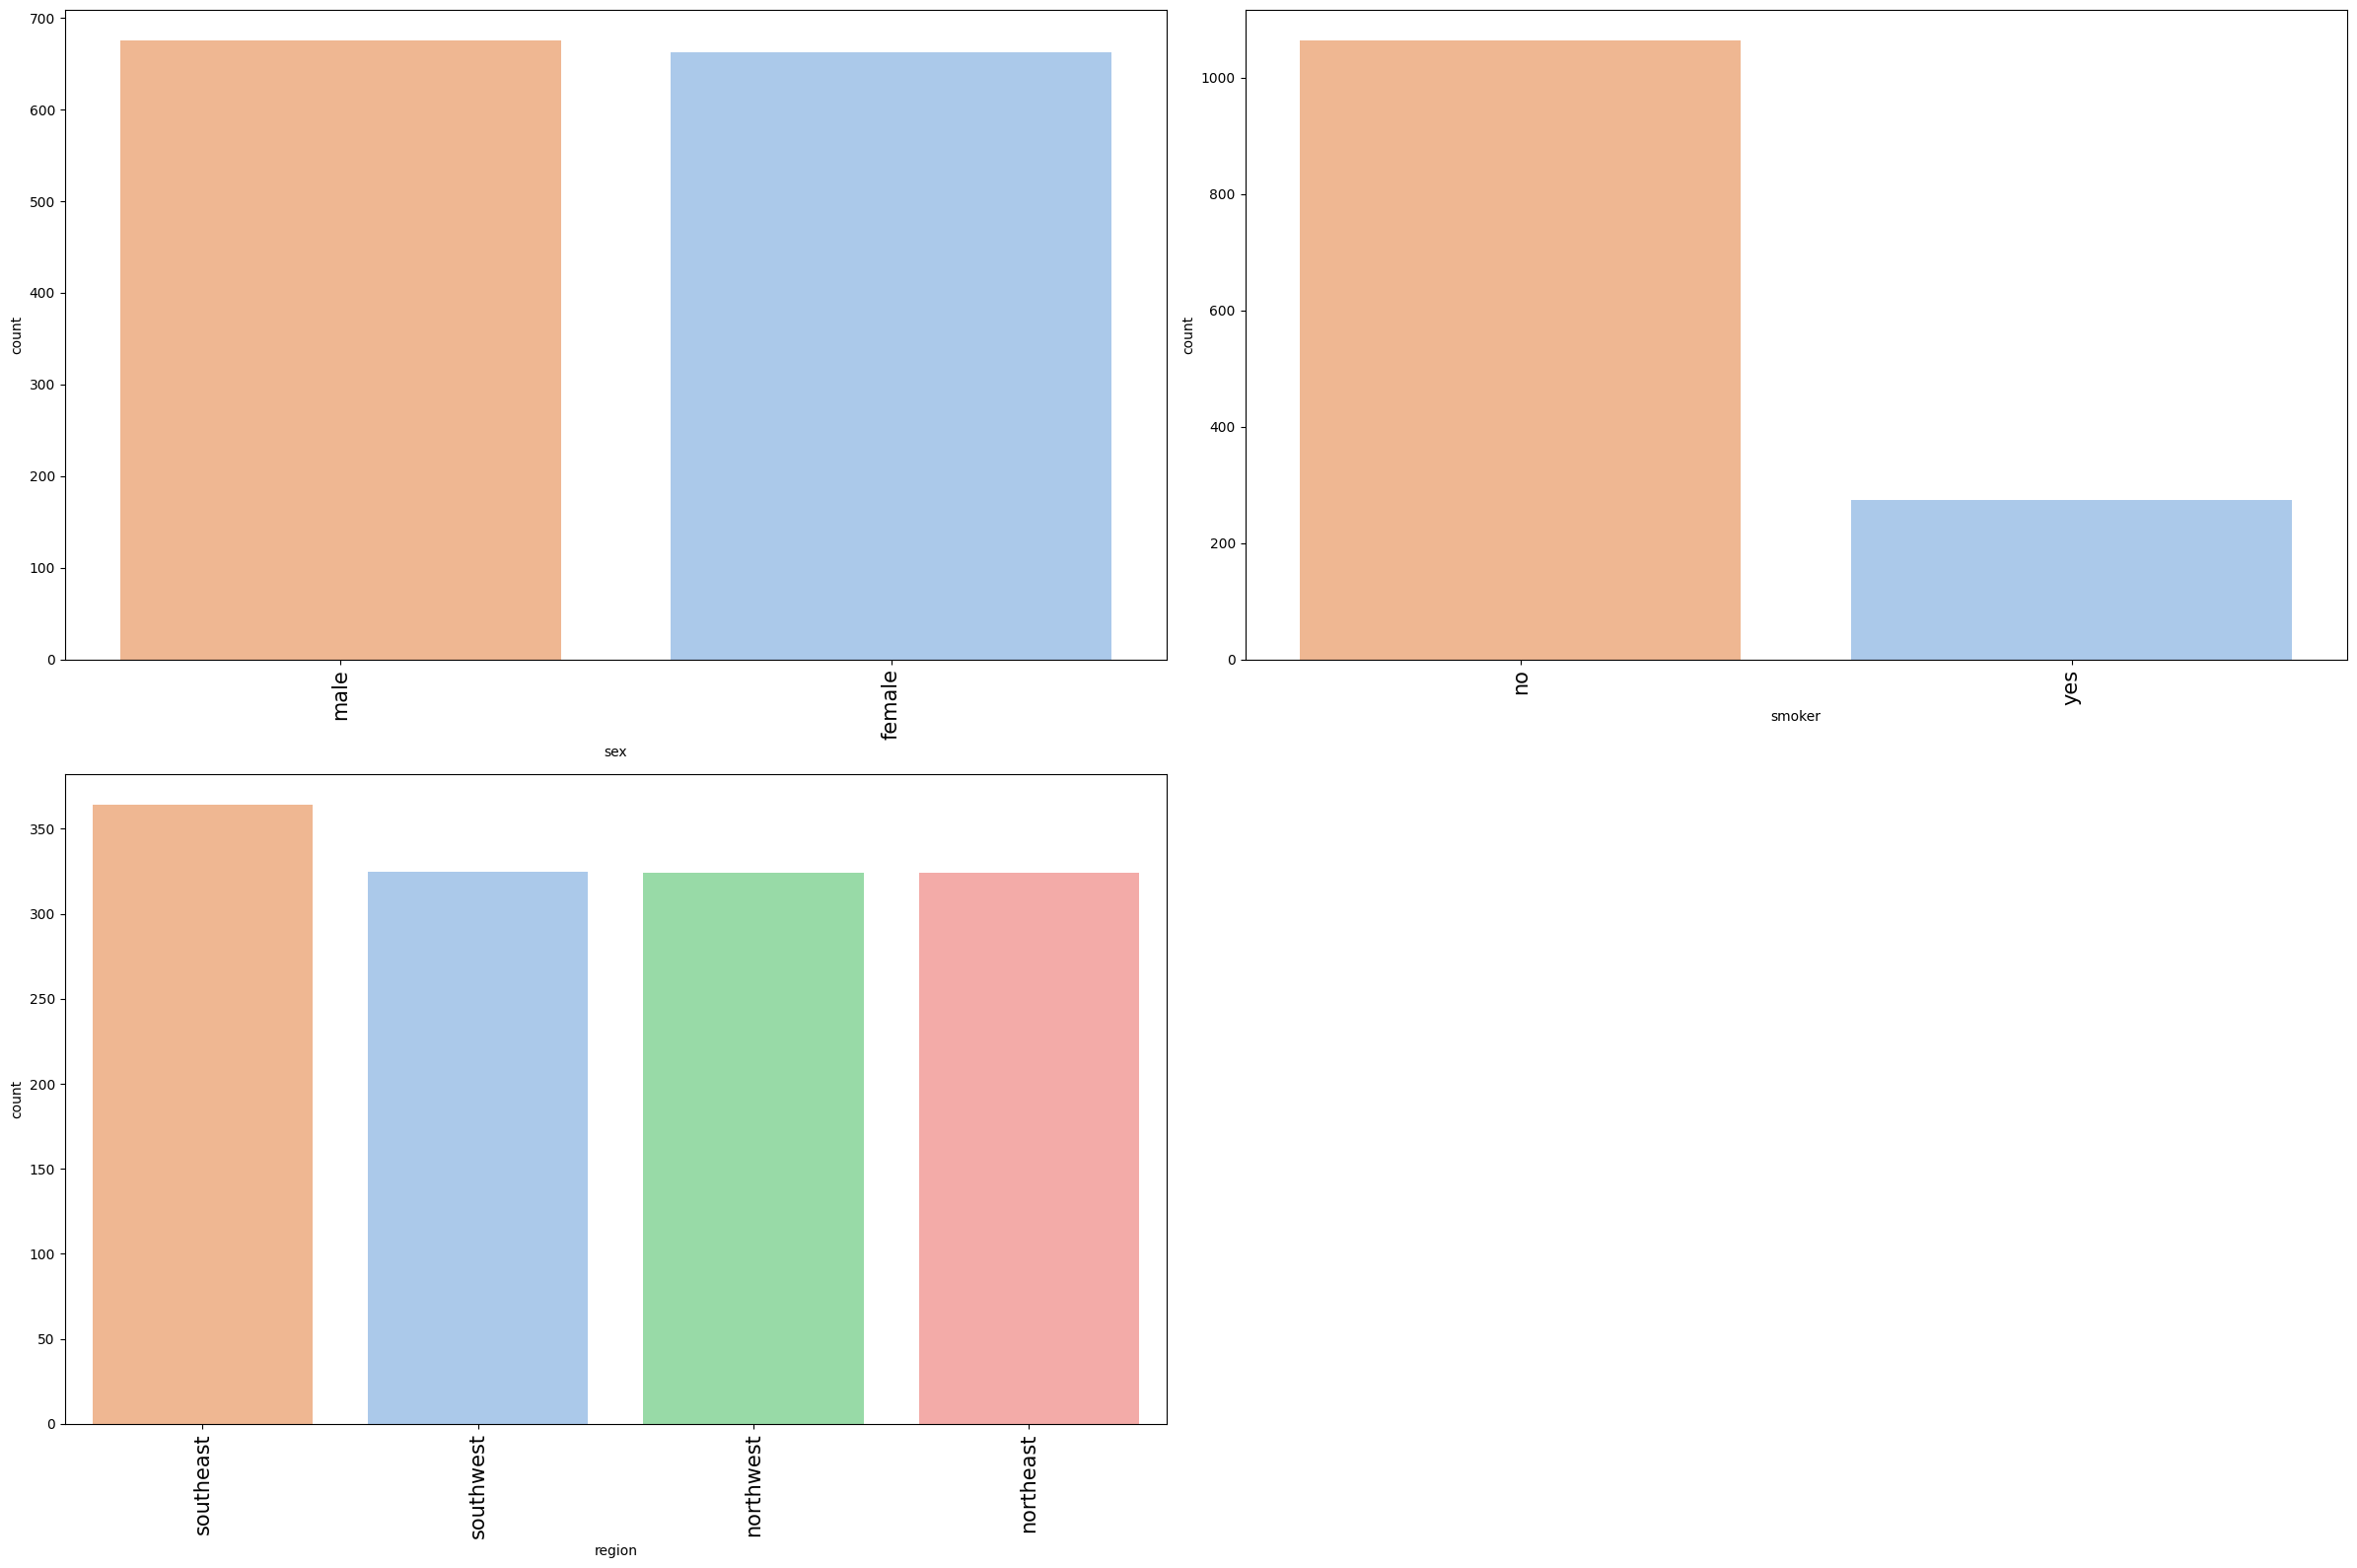


 🔢 NUMERIC VARIABLES


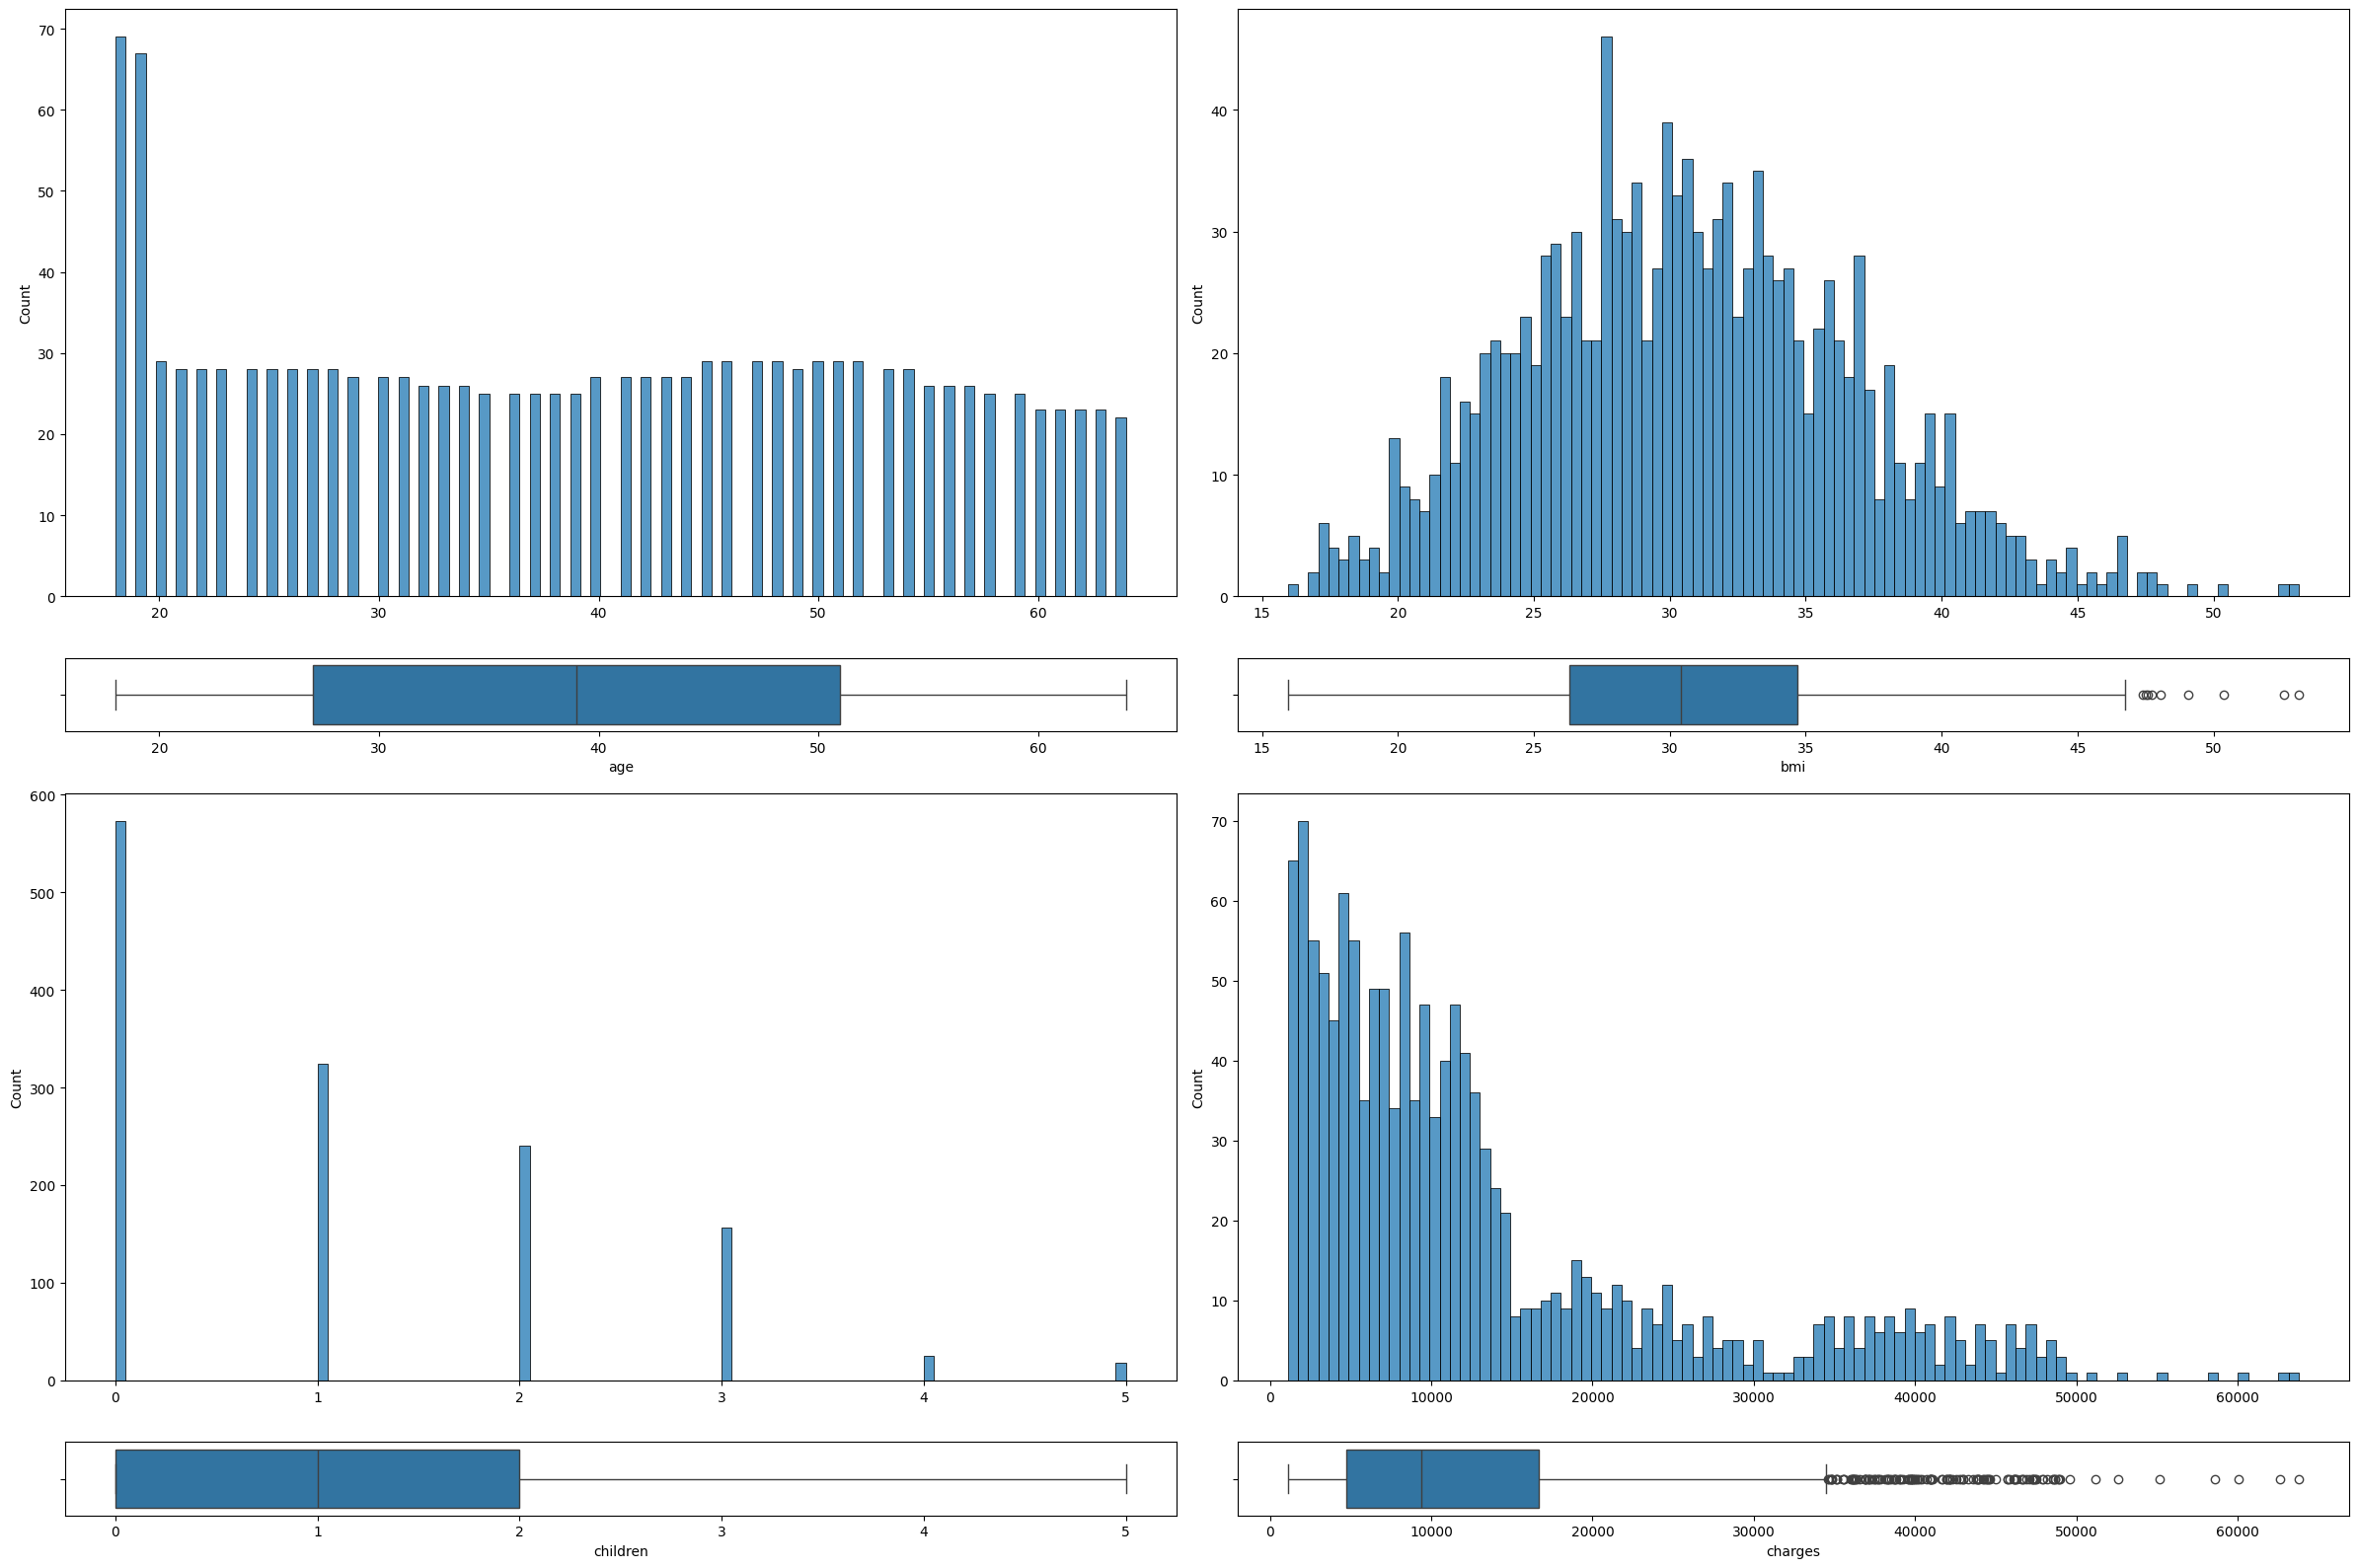

In [45]:
# -------------------------------
# STEP 5 - UNIVARIABLE ANALYSIS
# -------------------------------
print("STEP 5 - UNIVARIABLE ANALYSIS")

if not make_plots:
    print("UNIVARIABLE ANALYSIS is not printed, set make_plots = True")
else:
    # Copy  of previous DataFrame
    df_S5 = df_S4.copy()

    
    print("\n 🏷️ CATEGORY VARIABLES")

    # Set plotting variables
    var_to_plot=category_var # Variable type for this plot
    num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

    # Create subplots
    fig, axes = plt.subplots(
        nrows = num_rows,
        ncols = num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
        
    # Flatten the axes array for easier access
    axes = axes.flatten()  

    # Loop through variables
    idx = 0
    for col in var_to_plot:
        # Count unique values
        unique_count = df_S5[col].nunique()
        
        # Limit the number of plotted categories if there are more than num_values_to_plot
        if unique_count > num_values_to_plot:
            order = df_S5[col].value_counts().head(num_values_to_plot).index
        else:
            order = df_S5[col].value_counts().index
        
        # Create countplot
        sns.countplot(
            ax = axes[idx],
            data = df_S5,
            x = col,
            hue = col,
            palette = my_palette,
            order = order,
            legend = False)
        axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)
        
        # Add text box if truncated
        if unique_count > num_values_to_plot:
            msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
            axes[idx].text(
                x = 0.5,
                y = 0.9,
                s = msg,
                transform=axes[idx].transAxes,
                fontsize=my_font_size,
                color='red',
                ha='center',
                va='top',
                bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red'))
        
        idx += 1

    # Turn off unused axes if there are any
    for j in range(idx, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    print("\n 🔢 NUMERIC VARIABLES")

    # Set plotting variables
    var_to_plot=numeric_var # Variable type for this plot
    num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

    # Create subplots with custom height ratios
    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols =  num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 0.5] * num_rows})

    # Loop through variables
    var_idx = 0
    for row in range(num_rows):
        for col in range(num_cols):
            if var_idx >= len(var_to_plot):
                # Hide unused subplots
                axes[row * 2, col].set_visible(False)
                axes[row * 2 + 1, col].set_visible(False)
                continue

            # Histogram (top)
            sns.histplot(
                ax = axes[row * 2, col],
                data = df_S5,
                x = var_to_plot[var_idx],
                bins = num_bins)
            axes[row * 2, col].set_xlabel("")

            # Boxplot (bottom)
            sns.boxplot(
                ax=axes[row * 2 + 1, col],
                data=df_S5,
                x = var_to_plot[var_idx])
            
            var_idx += 1

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

CONCLUSIONS:
- data is well divided between male and female
- most of the data are non-smokers
- data is well divided among the 4 different regions
- bmi shows some outliers
- charges shows many outliers, we have to be carefull to drop to many data here -> better to do approach of EXTREME OUTLIERS


STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET

 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target


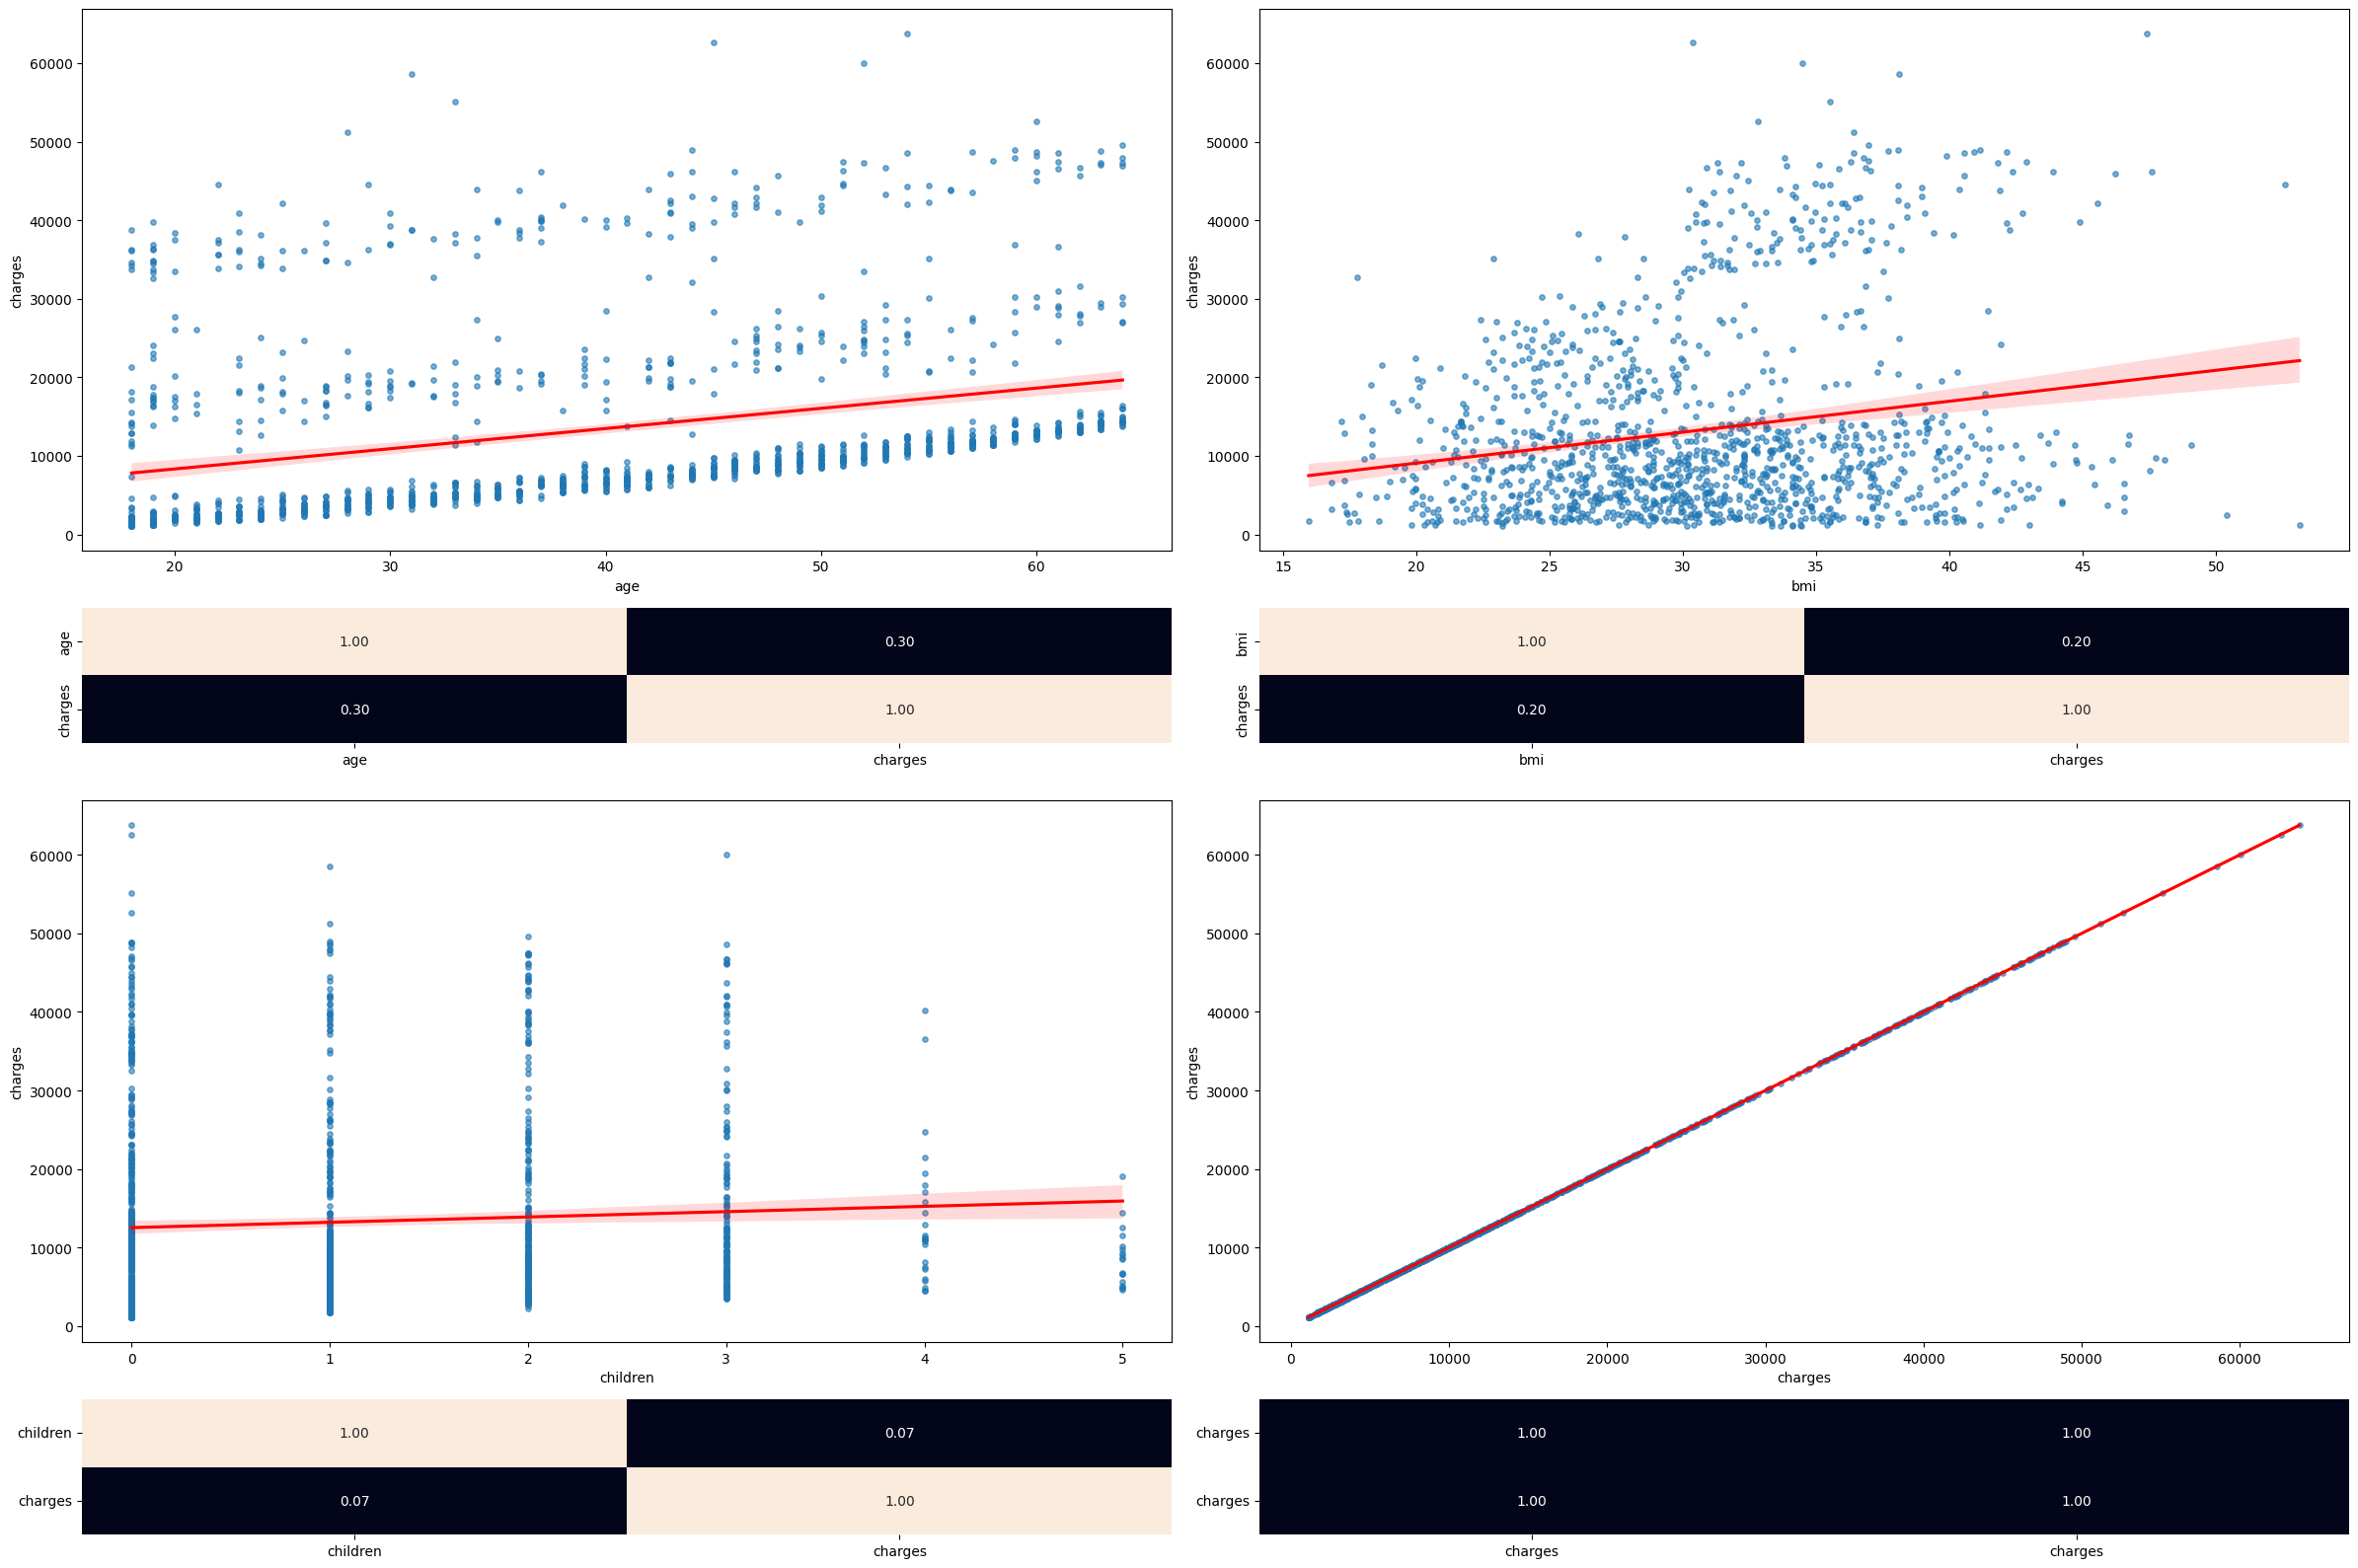


 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target


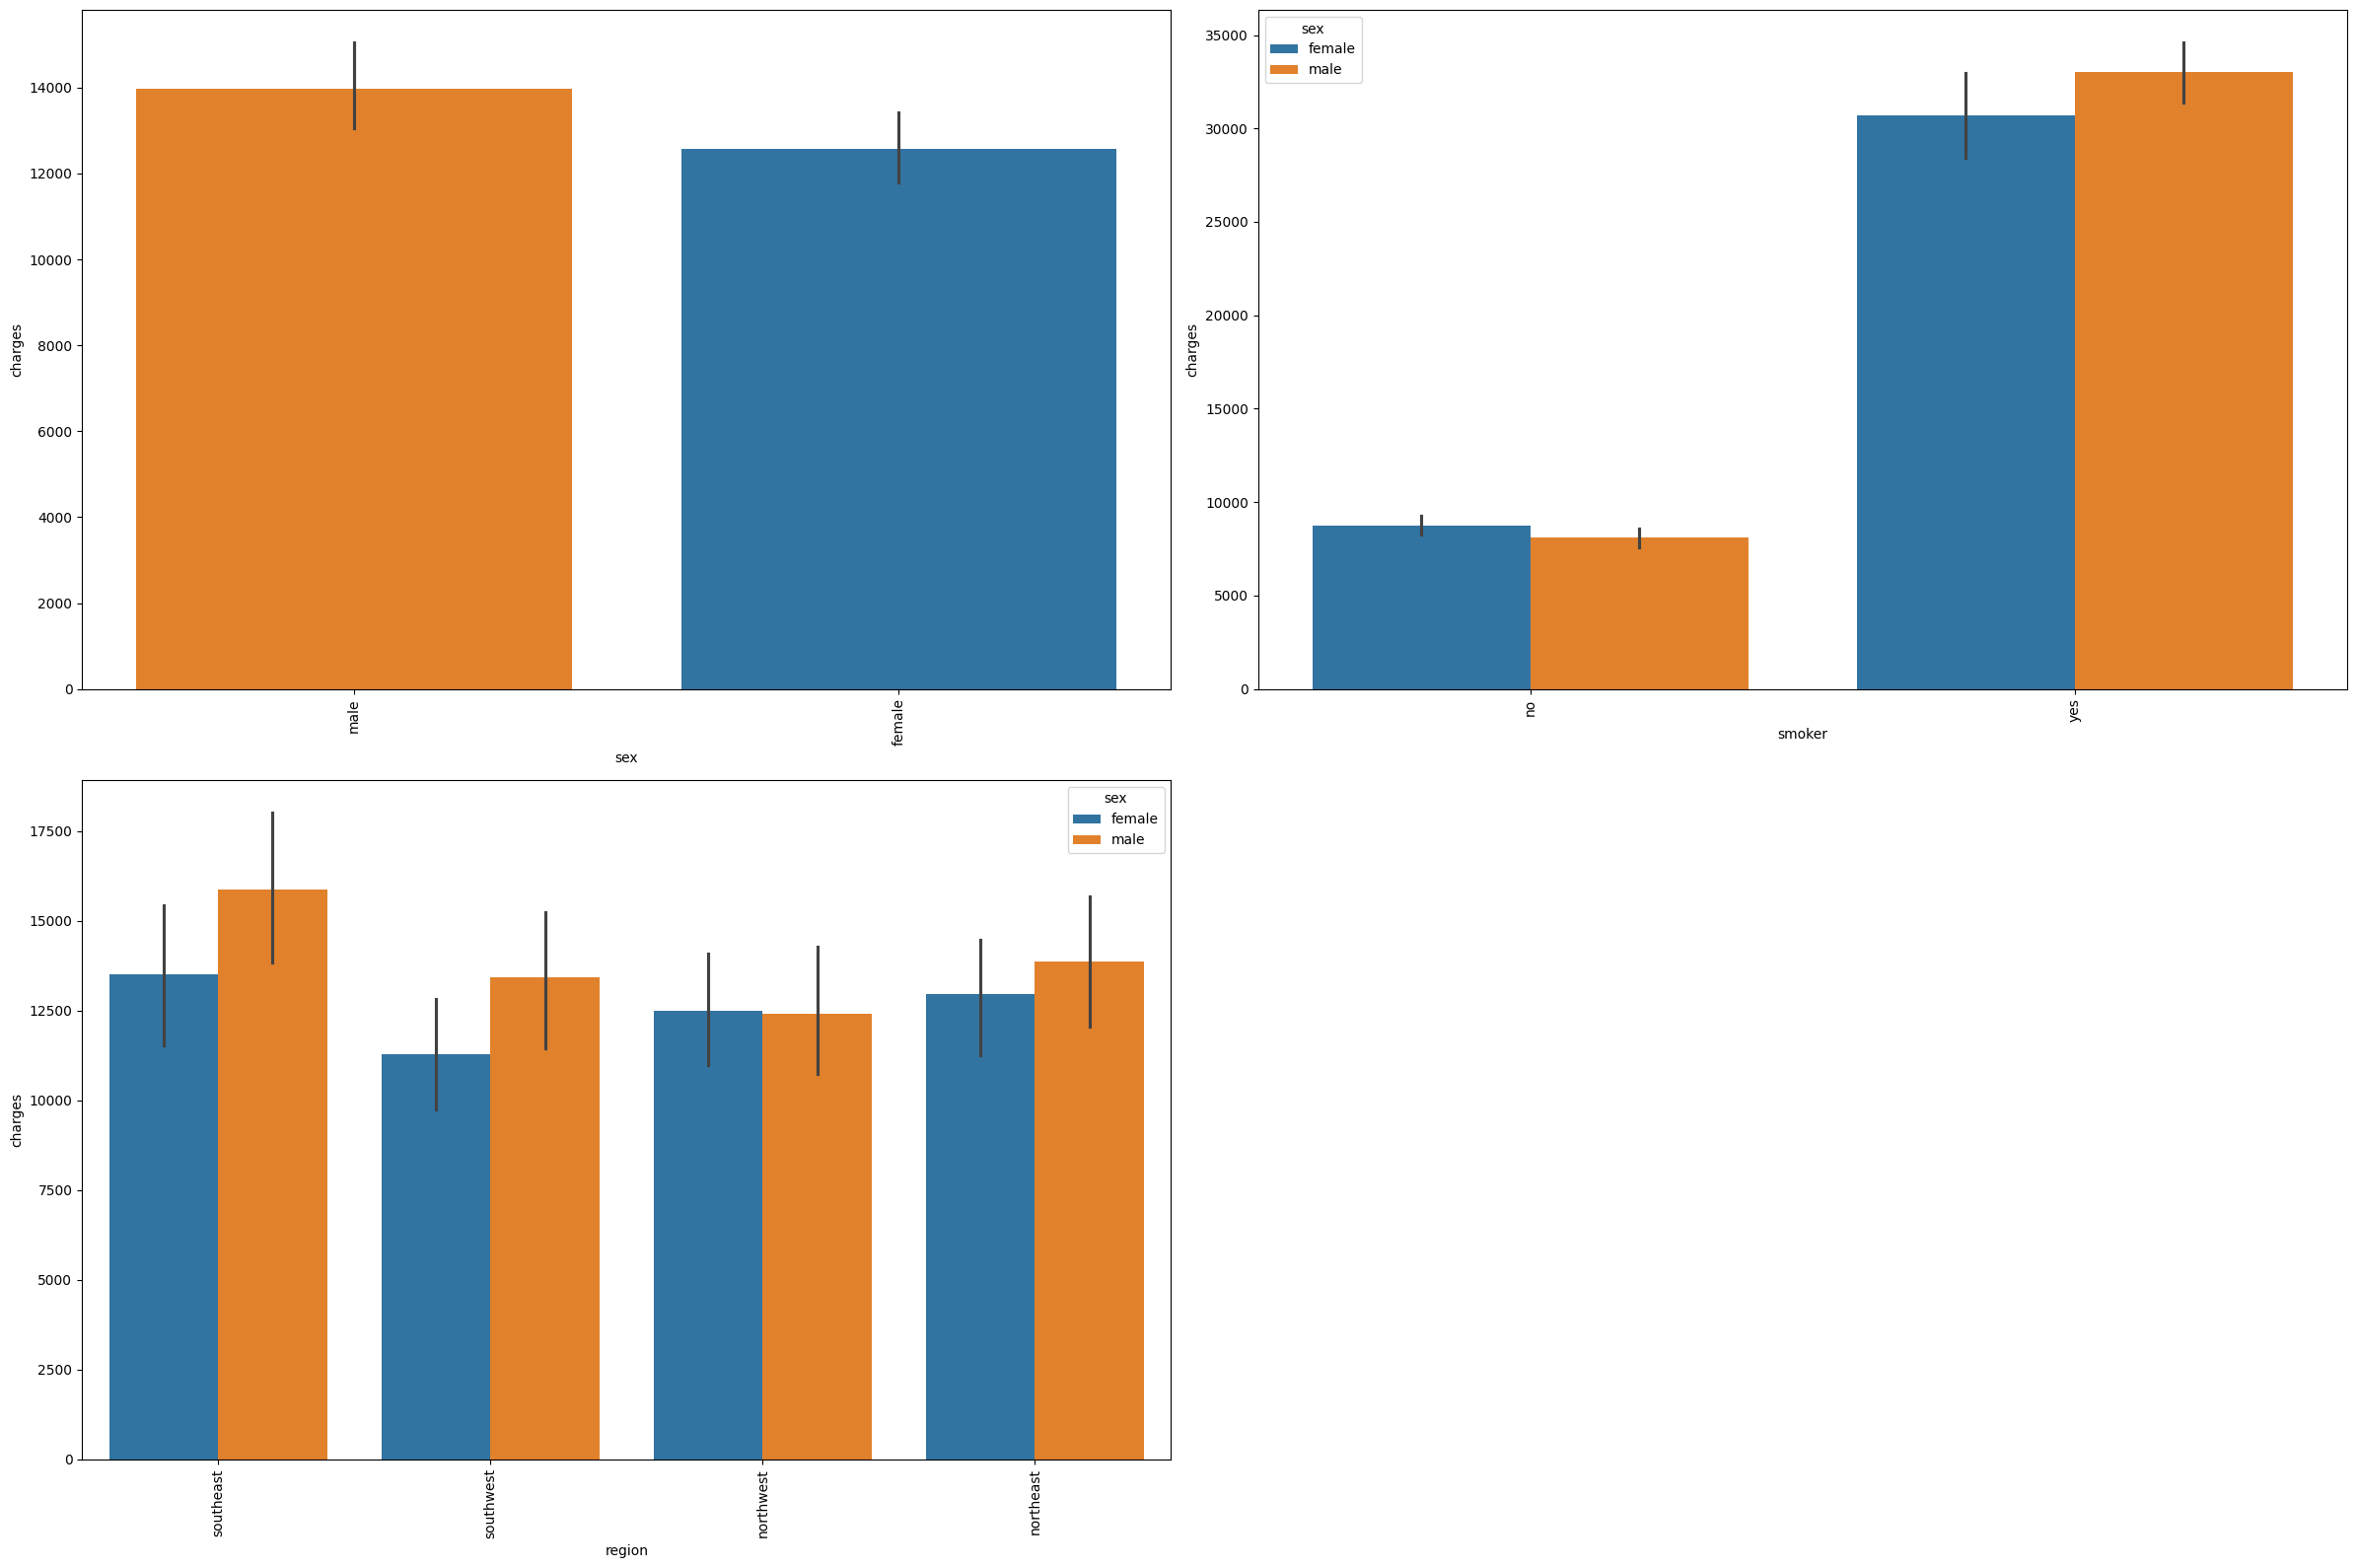


 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target
   This type of plot is non applicable for this case, because the target variable is NUMERIC


In [46]:
# -------------------------------
# STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET
# -------------------------------
print("STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET")

if not make_plots:
    print("MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET is not printed, set make_plots = True")
else:
    # Copy  of previous DataFrame
    df_S6 = df_S4.copy()

    print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target")

    if y_var not in numeric_var:
        print("   This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:
        # Set plotting variables
        var_to_plot=numeric_var # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots with custom height ratios
        fig, axes = plt.subplots(
            nrows = num_rows * 2,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
            gridspec_kw={'height_ratios': [4, 1] * num_rows})

        # Loop through variables
        var_idx = 0
        for row in range(num_rows):
            for col in range(num_cols):
                if var_idx >= len(var_to_plot):
                    # Hide unused subplots
                    axes[row * 2, col].set_visible(False)
                    axes[row * 2 + 1, col].set_visible(False)
                    continue

                # Regplot (top)
                sns.regplot(
                    ax = axes[row * 2, col],
                    data = df_S6,
                    x = var_to_plot[var_idx],
                    y = y_var,
                    scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                    line_kws = {'color': 'red'})

                # Boxplot (bottom)
                sns.heatmap(
                    ax = axes[row * 2 + 1, col],
                    data = df_S6[[var_to_plot[var_idx], y_var]].corr(),
                    annot = True,
                    fmt = ".2f",
                    cbar = False)

                var_idx += 1

        # Adjust layout
        plt.tight_layout()
        plt.show()
    
    print("\n 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target")

    if y_var not in numeric_var:
        print("   This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:        
        # Set plotting variables
        var_to_plot=category_var # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows))

        # flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:

            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create barplot
            sns.barplot(
                ax=axes[idx],
                data = df_S6,
                x = col,
                y = y_var,
                hue = cat_var_comb,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=10)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize = my_font_size,
                    color = 'red',
                    ha = 'center',
                    va = 'top',
                    bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()

    print("\n 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target")

    if y_var not in category_var:
        print("   This type of plot is non applicable for this case, because the target variable is NUMERIC")
    else:
        # Set plotting variables
        hue_order = sorted(df_S6[y_var].dropna().unique().tolist()) # Determine hue order dynamically
        var_to_plot=category_var # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
            
        # Flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:
            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create countplot
            sns.countplot(
                ax = axes[idx],
                data = df_S6,
                x = col,
                hue = y_var,
                hue_order = hue_order,
                palette = my_palette,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize=my_font_size,
                    color='red',
                    ha='center',
                    va='top',
                    bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()


CONCLUSIONS:
- children present low lineal correlation with target variable, maybe dropping this attribute might improve the model
- males have slighly more tendecy to smoke than females
- northwest is the only region with more females than males

STEP 7 - MULTIVARIANT ANALYSIS - ALL VS ALL

 🔢 NUMERIC VS 🔢 NUMERIC


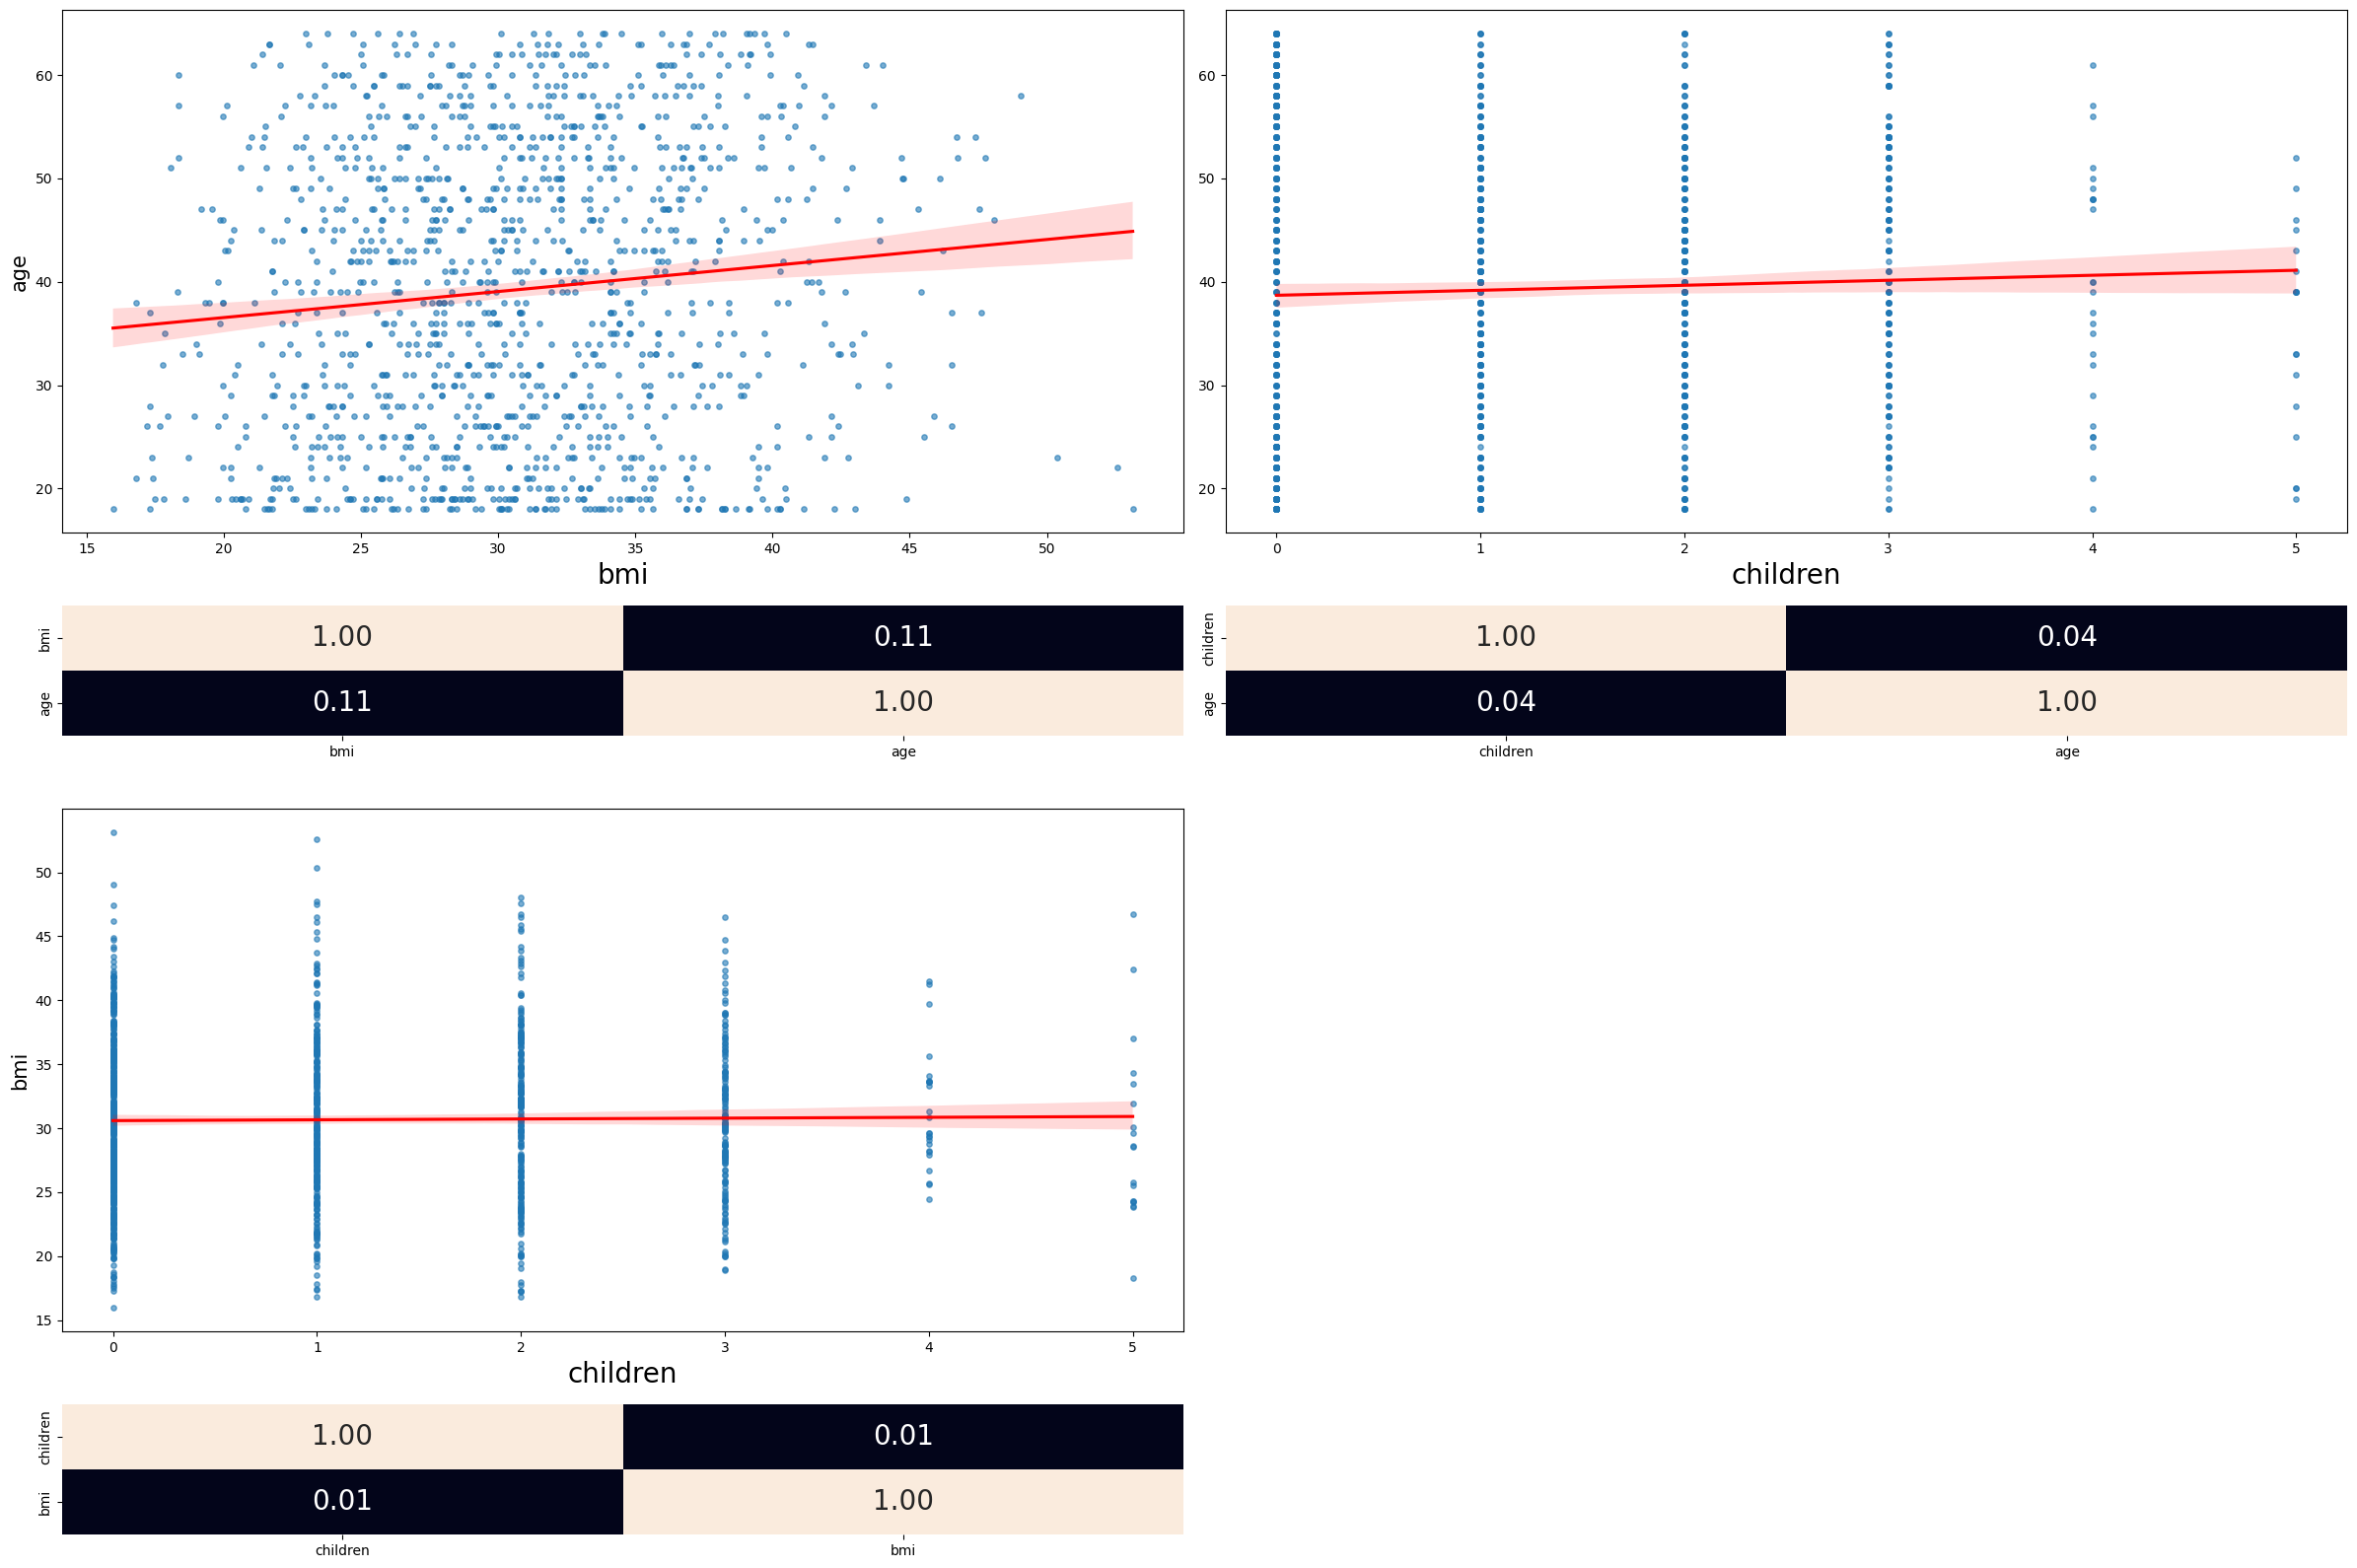


 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes


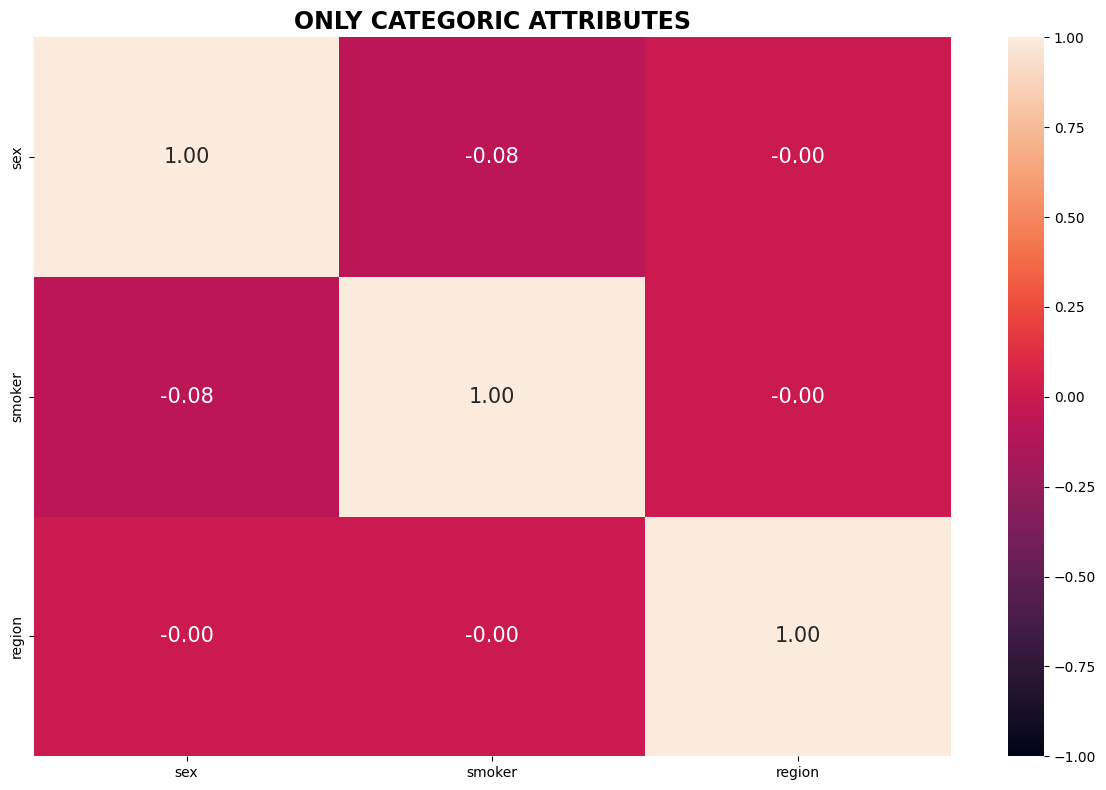

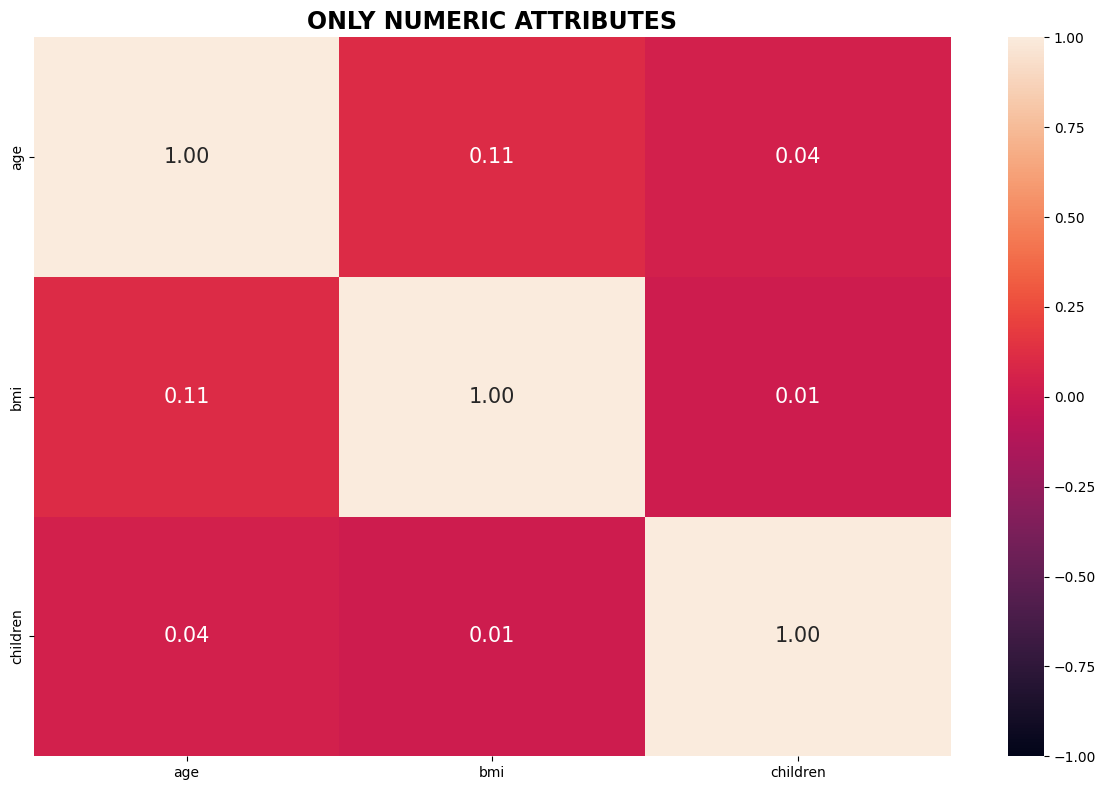

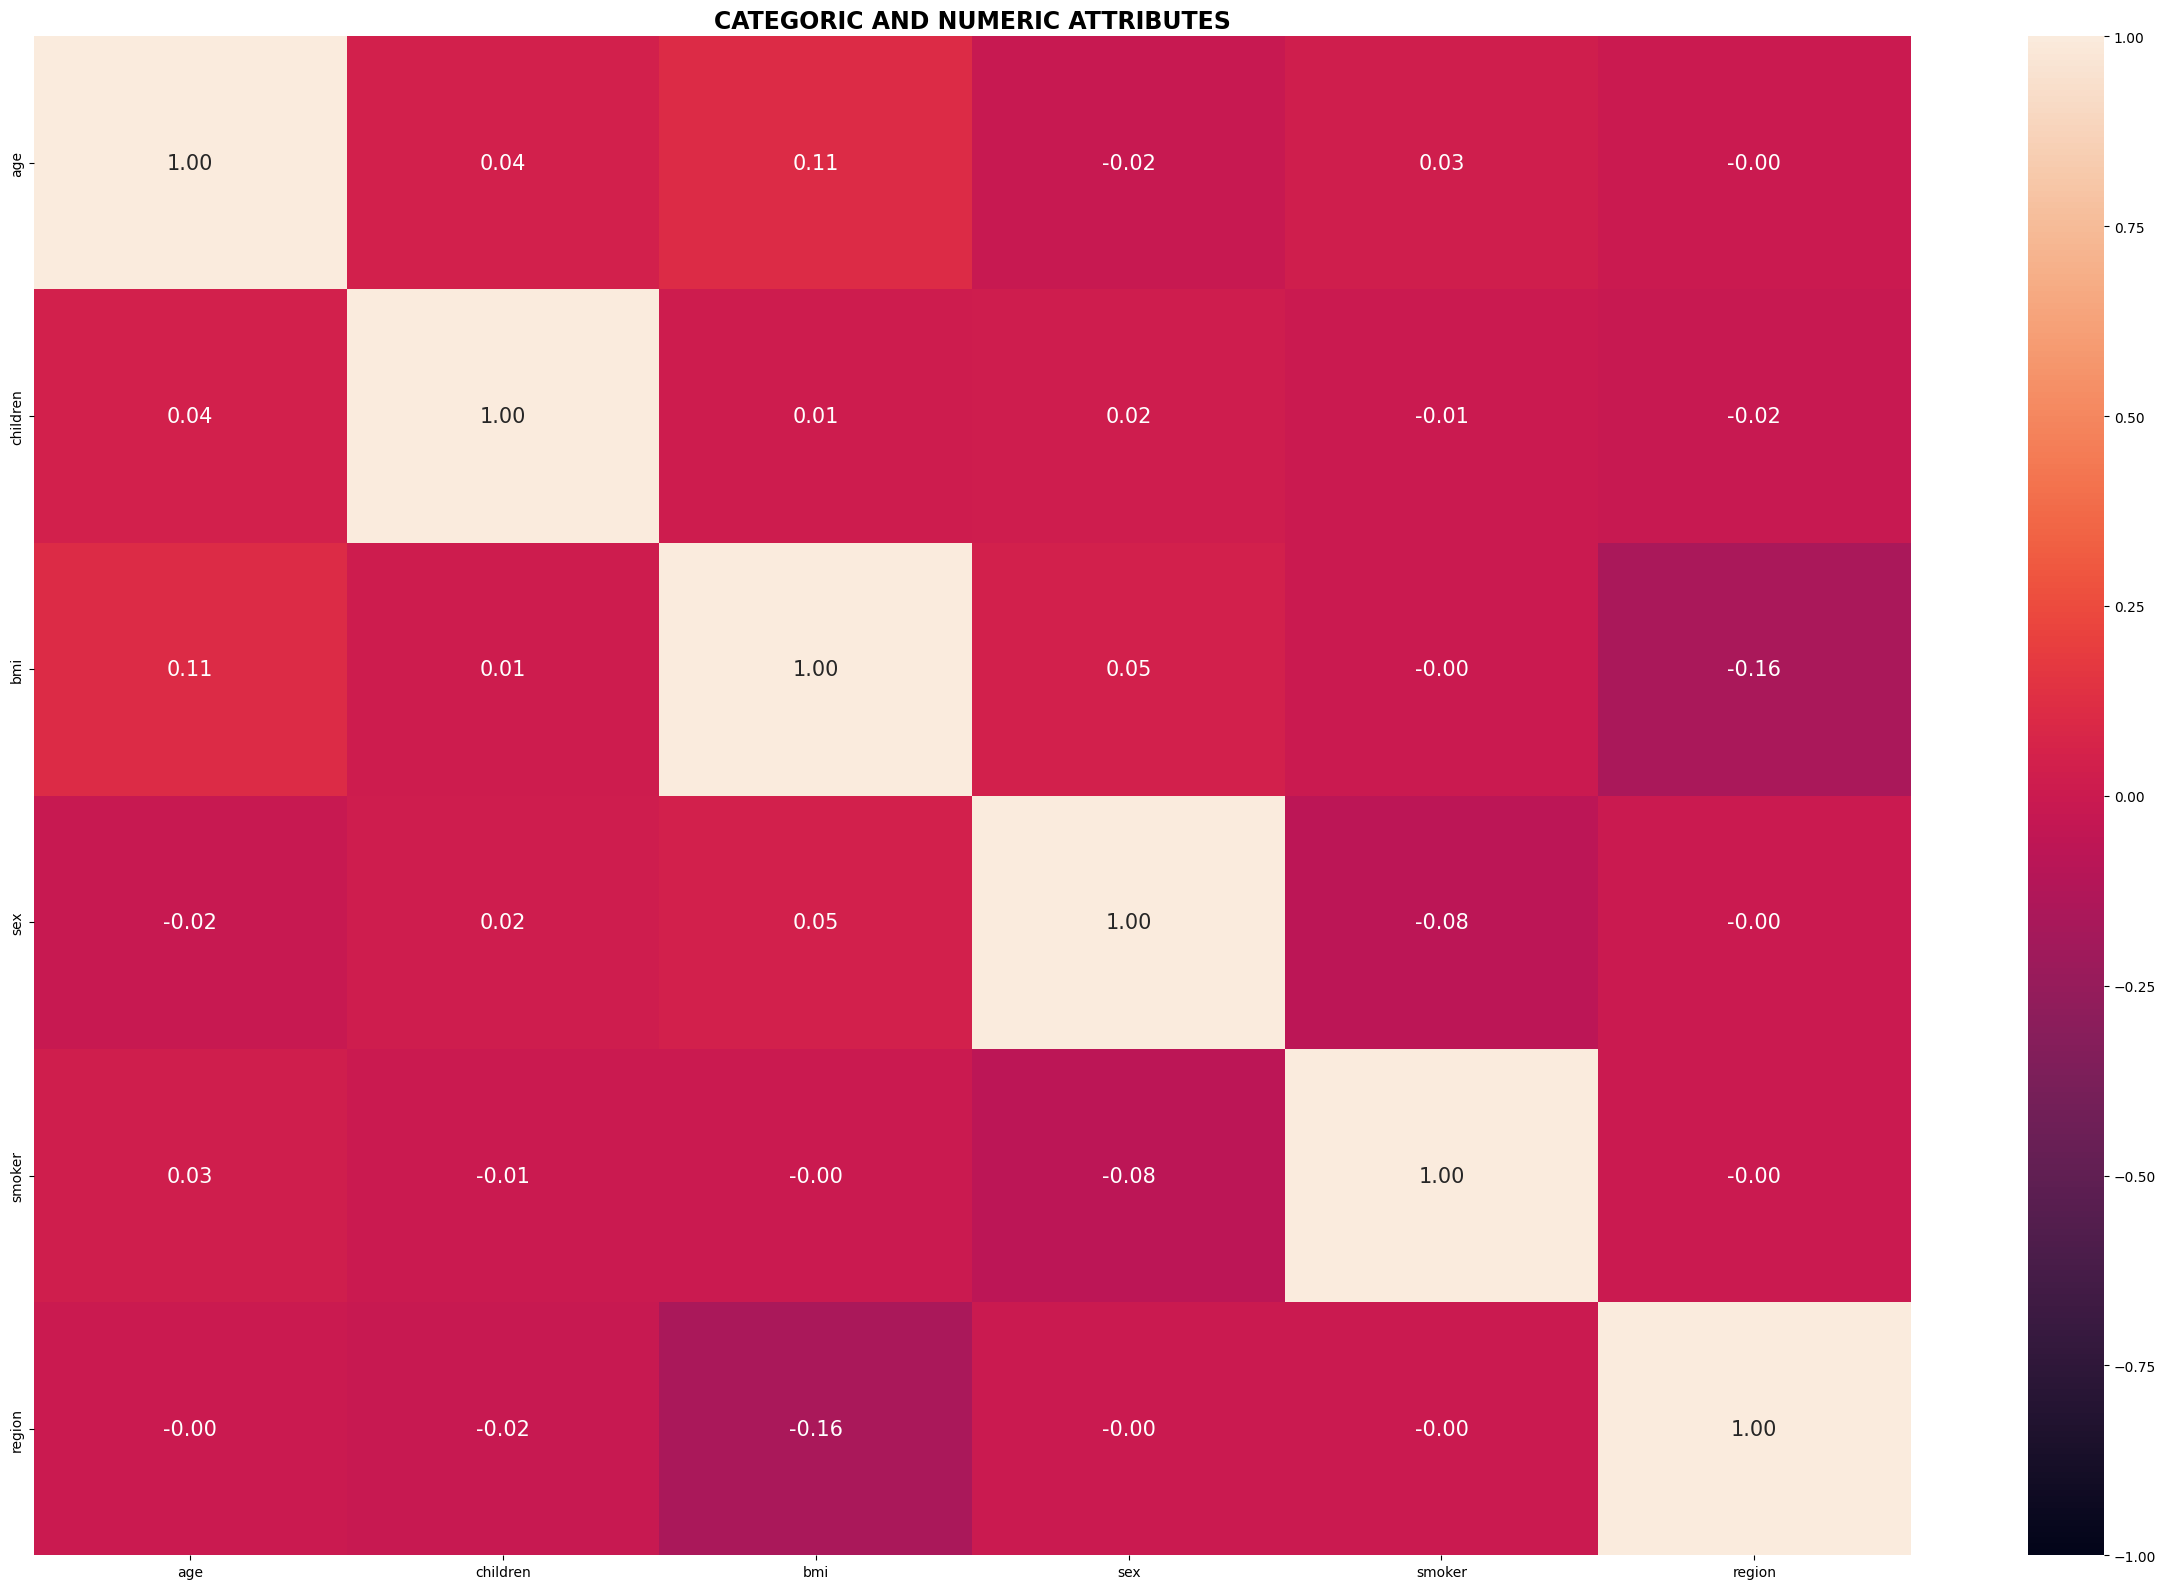

<Figure size 1200x800 with 0 Axes>

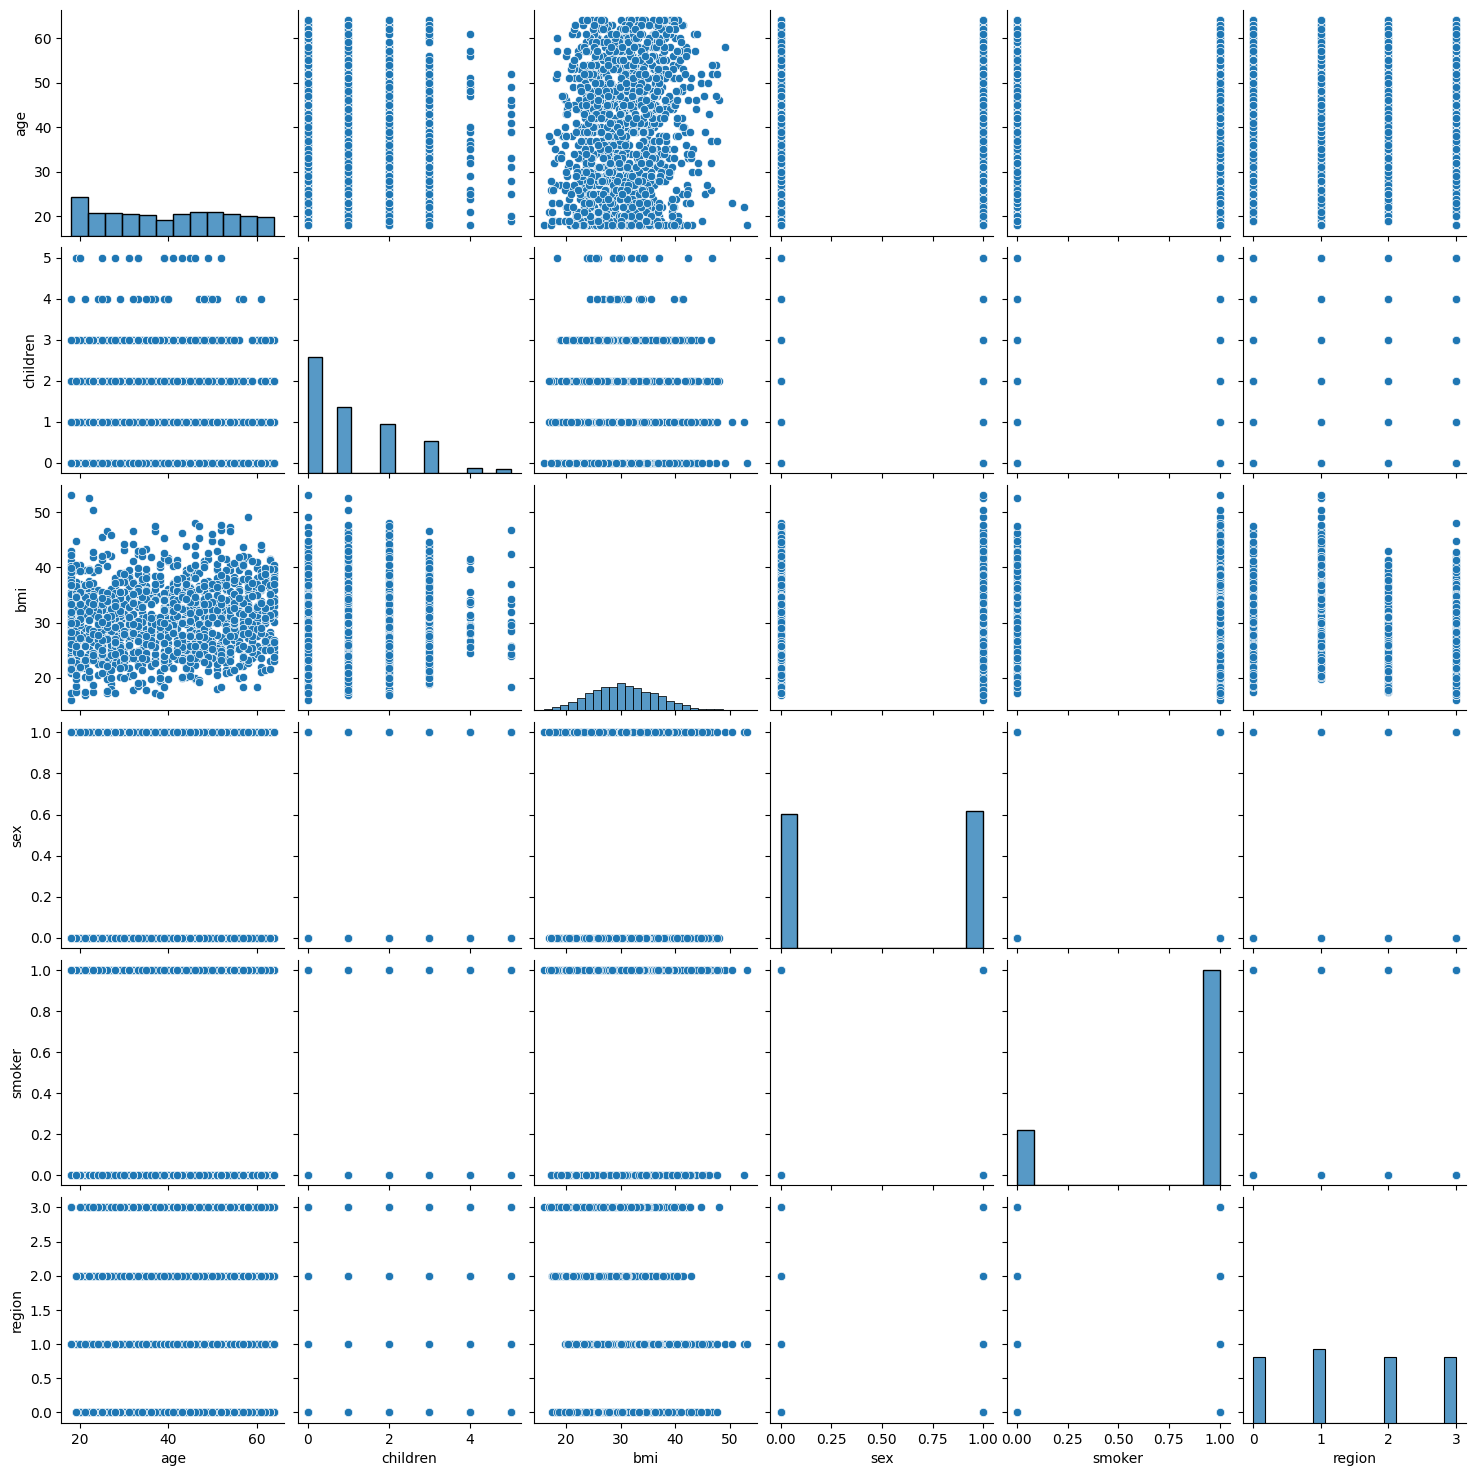

In [ ]:
# -------------------------------
# STEP 7 - MULTIVARIANT ANALYSIS - ALL VS ALL
# -------------------------------
print("STEP 7 - MULTIVARIANT ANALYSIS - ALL VS ALL")

if not make_plots:
    print("MULTIVARIANT ANALYSIS - ALL VS ALL is not printed, set make_plots = True")
else:
    # Copy of previous DataFrame
    df_S7 = df_S4.copy()

    # Exclude target variable from plots
    numeric_var_plot = [col for col in numeric_var if col != y_var]
    category_var_plot = [col for col in category_var if col != y_var]

    print("\n 🔢 NUMERIC VS 🔢 NUMERIC")

    var_to_plot = numeric_var_plot
    num_rows = len(var_to_plot) - 1  # Number of rows (one less than number of variables)

    # Create subplots with two stacked plots (regplot + heatmap) per variable pair
    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols = len(var_to_plot) - 1,
        figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 1] * num_rows})

    # Flatten axes for easy handling
    axes = np.array(axes)

    # Track subplot usage
    for row in range(num_rows):
        n_cols = len(var_to_plot) - row - 1  # Decreasing number of columns each row
        for col in range(n_cols):

            # Top: regplot
            sns.regplot(
                ax = axes[row * 2, col],
                data = df_S7,
                x = var_to_plot[row + col + 1],
                y = var_to_plot[row],
                scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                line_kws = {'color': 'red'})
            axes[row * 2, col].set_xlabel(var_to_plot[row + col + 1], fontsize=20)

            # Show Y label only for first plot in row
            if col == 0:
                axes[row * 2, col].set_ylabel(var_to_plot[row], fontsize=my_font_size)
            else:
                axes[row * 2, col].set_ylabel("")

            # Bottom: heatmap (correlation)
            sns.heatmap(
                ax = axes[row * 2 + 1, col],
                data = df_S7[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
                annot = True,
                fmt = ".2f",
                cbar = False,
                annot_kws = {"size": 20})

        # Hide unused subplots on the right for this row
        for col in range(n_cols, len(var_to_plot) - 1):
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

    print("\n 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes")

    # Encode categorical variables using the Series.factorize() method
    for col in category_var_plot:
        codes, uniques = df_S7[col].factorize()
        df_S7[col] = codes  # replace column with integer codes

    # CATEGORIC ATTRIBUTES HEATMAP
    if len(category_var_plot) > 1:
        corr_cat = df_S7[category_var_plot].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY CATEGORIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_cat,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough categorical variables for a correlation matrix.")

    # NUMERIC ATTRIBUTES HEATMAP
    if len(numeric_var_plot) > 1:
        corr_num = df_S7[numeric_var_plot].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY NUMERIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_num,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough numeric variables for a correlation matrix.")

    # ALL VARIABLES HEATMAP
    corr_matrix = df_S7[numeric_var_plot + category_var_plot].corr()
    corr_order = corr_matrix.mean().sort_values(ascending=False).index
    corr_matrix = corr_matrix.loc[corr_order, corr_order]

    fig = plt.figure(figsize=(2 * figWidth_unit, 2 * figHeight_unit))
    plt.title("CATEGORIC AND NUMERIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_matrix,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()

    # PAIRPLOT (sorted by correlation order)
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    sns.pairplot(data=df_S7[corr_order])
    plt.show()


CONCLUSIONS:
- attributes do not keeo a hight correlation between them -> no noise

In [57]:
# -------------------------------
# STEP 8) REMOVE NOISY ATTRIBUTES
# -------------------------------
print("STEP 8) REMOVE NOISY ATTRIBUTES")

# Copy of previous DataFrame
df_S8 = df_S4.copy()

# Correlation level considered as "too high"
corr_threshold = 0.9  

# ==========================================
#  NUMERIC VARIABLES (Pearson correlation)
# ==========================================
numeric_var_no_target = [col for col in numeric_var if col != y_var]
corr_matrix = df_S8[numeric_var_no_target].corr().abs()
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_threshold:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            if col_i not in to_drop:
                to_drop.add(col_i)

if to_drop:
    df_S8 = df_S8.drop(columns=list(to_drop), axis=1)
    print(f"- ⚠️ High NUMERIC correlation detected (Pearson Corr. > {corr_threshold}). Dropped:")
    for col in to_drop:
        print(f"   • {col}")
else:
    print(f"- ✅ No NUMERIC attributes exceeded {corr_threshold} Pearson Correlation")

# ==========================================
#  CATEGORICAL VARIABLES (Cramér's V)
# ==========================================
# Compute Cramér’s V statistic for categorical–categorical association
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

category_var_no_target = [col for col in category_var if col != y_var]
to_drop_cat = set()

if len(category_var_no_target) > 1:
    for i in range(len(category_var_no_target)):
        for j in range(i):
            v = cramers_v(df_S8[category_var_no_target[i]], df_S8[category_var_no_target[j]])
            if v > corr_threshold:
                col_i = category_var_no_target[i]
                col_j = category_var_no_target[j]
                if col_i not in to_drop_cat:
                    to_drop_cat.add(col_i)

if to_drop_cat:
    df_S8 = df_S8.drop(columns=list(to_drop_cat), axis=1)
    print(f"- ⚠️ High CATEGORICAL association detected (Cramer’s V > {corr_threshold}). Dropped:")
    for col in to_drop_cat:
        print(f"   • {col}")
else:
    print(f"- ✅ No CATEGORICAL attributes exceeded {corr_threshold} Cramer’s V")

#  Print results
print(f"- ℹ️ Previous df's columns: {len(df_S4.columns)}")
print(f"- ℹ️ Cleaned df's  columns: {len(df_S8.columns)}")
print(f"- ℹ️ Final DataFrame shape: {df_S8.shape}")

display(df_S8.head())


STEP 8) REMOVE NOISY ATTRIBUTES
- ✅ No NUMERIC attributes exceeded 0.9 Pearson Correlation
- ✅ No CATEGORICAL attributes exceeded 0.9 Cramer’s V
- ℹ️ Previous df's columns: 7
- ℹ️ Cleaned df's  columns: 7
- ℹ️ Final DataFrame shape: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
# -------------------------------
# STEP 9) CLEAN OUTLIERS
# -------------------------------
print("STEP 9) CLEAN OUTLIERS")

# Copy  of previous DataFrame
df_S9=df_S8.copy()

low_outliers_threshold = 1.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 1.0  # [% ]Max percentage of upper outliers allowed to remove
removal_type = "EXTREME OUTLIERS" # Removal logic type (NORMAL or EXTREME outliers)

# Print info
display(df_S9.describe())

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_var:
    if col in df_S9.columns.to_list():
        cols.append(col)

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []
extreme_lower_limits = []
extreme_upper_limits = []
n_extreme_outliers_lower = []
n_extreme_outliers_upper = []
pct_extreme_outliers_lower = []
pct_extreme_outliers_upper = []

len(df_S9.index)

for col in cols:
    Q1 = df_S9[col].quantile(0.25)
    Q3 = df_S9[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count num of outliers
    n_low = (df_S9[col] < lower).sum()
    n_high = (df_S9[col] > upper).sum()
    n_extreme_low = (df_S9[col] < extreme_lower).sum()
    n_extreme_high = (df_S9[col] > extreme_upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S9.index)) * 100
    pct_high = (n_high / len(df_S9.index)) * 100
    pct_extreme_low = (n_extreme_low / len(df_S9.index)) * 100
    pct_extreme_high = (n_extreme_high / len(df_S9.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)
    extreme_lower_limits.append(extreme_lower)
    extreme_upper_limits.append(extreme_upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)
    n_extreme_outliers_lower.append(n_extreme_low)
    n_extreme_outliers_upper.append(n_extreme_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)
    pct_extreme_outliers_lower.append(pct_extreme_low)
    pct_extreme_outliers_upper.append(pct_extreme_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
df_extreme_limits = pd.DataFrame(
    [
        extreme_lower_limits,
        extreme_upper_limits,
        n_extreme_outliers_lower,
        n_extreme_outliers_upper,
        pct_extreme_outliers_lower,
        pct_extreme_outliers_upper
    ],
    columns=cols,
    index=[
        "extreme_lower_limit",
        "extreme_upper_limit",
        "n_extreme_outliers_lower",
        "n_extreme_outliers_upper",
        "pct_extreme_outliers_lower",
        "pct_extreme_outliers_upper"
    ]
)
# Display results
display(df_limits)
display(df_extreme_limits)

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_var:
    if col in df_S9.columns.to_list():
        cols.append(col)

if removal_type == "NORMAL OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_limits.loc["lower_limit", col]
        high_limit = df_limits.loc["upper_limit", col]
        pct_low = df_limits.loc["pct_outliers_lower", col]
        pct_high = df_limits.loc["pct_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")
elif removal_type == "EXTREME OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
        high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
        pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
        pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None extreme lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None extreme upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")

print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S9)}")
display(df_S9.describe())

STEP 9) CLEAN OUTLIERS


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


,age,bmi,children,charges
lower_limit,-9.0,13.675000,-3.0,-13120.716175
upper_limit,87.0,47.315000,5.0,34524.777625
n_outliers_lower,0.0,0.000000,0.0,0.000000
n_outliers_upper,0.0,9.000000,0.0,139.000000
pct_outliers_lower,0.0,0.000000,0.0,0.000000
pct_outliers_upper,0.0,0.673149,0.0,10.396410


,age,bmi,children,charges
extreme_lower_limit,-45.0,1.06,-6.0,-30987.776350
extreme_upper_limit,123.0,59.93,8.0,52391.837800
n_extreme_outliers_lower,0.0,0.00,0.0,0.000000
n_extreme_outliers_upper,0.0,0.00,0.0,6.000000
pct_extreme_outliers_lower,0.0,0.00,0.0,0.000000
pct_extreme_outliers_upper,0.0,0.00,0.0,0.448766


- ATTRIBUTE age:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected


- ATTRIBUTE bmi:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected


- ATTRIBUTE children:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected


- ATTRIBUTE charges:
 - ℹ️ None extreme lower outliers detected
 - ⚠️ REMOVED extreme upper outliers (0.45% <= 1.0%)


- ✅Outliers cleaning completed.
 - ℹ️ Original df's rows: 1337
 - ℹ️ Cleaned df's  rows: 1331


,age,bmi,children,charges
count,1331.000000,1331.000000,1331.000000,1331.000000
mean,39.192337,30.637382,1.097671,13074.007079
std,14.050467,6.090833,1.205658,11741.836631
min,18.000000,15.960000,0.000000,1121.873900
25%,26.500000,26.220000,0.000000,4729.002375
50%,39.000000,30.305000,1.000000,9304.701900
75%,51.000000,34.637500,2.000000,16435.694625
max,64.000000,53.130000,5.000000,51194.559140


CONCLUSIONS:
- charges have too many upper outliers, even extreme outliers, to drop that data
- I goint to stablish a "cut" based on extreme upper outliers, because if we focus "just in normal ouliers" we would loose a lot of data
- The "cut" would be for a maximum of 1 %, higher that than that, extreme outliers will not be dropped

In [16]:
# -------------------------------
# STEP 10) MISSING VALUES
# -------------------------------
print("STEP 10) MISSING VALUES")

# Copy  of previous DataFrame
df_S10=df_S9.copy()

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_var:
    if df_S10[col].nunique() < 6:
        group_vars.append(col)

# Calculate percentage of missing values per column
missing_pct = (df_S10.isnull().sum() / len(df_S10)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all")
else:
    # Process each column with missing data
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # Case 1: Fill with grouped median if percentage above threshold
        if pct > th_fill and len(group_vars) > 0:
            print(f" - ⚠️ FILLED missing values in {col} using grouped median by {group_vars}...\n")

            # Compute median by group
            medians = df_S10.groupby(group_vars)[col].median().reset_index()
            medians = medians.rename(columns={col: f"median_{col}"})

            # Merge medians back into df
            df_S10 = pd.merge(df_S10, medians, on=group_vars, how="left")

            # Fill missing values
            df_S10[col] = df_S10[col].fillna(df_S10[f"median_{col}"])

            # Drop helper column
            df_S10 = df_S10.drop(columns=[f"median_{col}"])

        # Case 2: Drop rows if percentage below or equal to threshold
        elif pct <= th_fill:
            print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {th_fill}%)...\n")
            df_S10 = df_S10.dropna(subset=[col])

        # Case 3: Skip if no suitable grouping columns
        else:
            print(f" - ℹ️ No suitable group columns found — skipping fill for {col}.\n")

# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S10.isnull().sum()}")

STEP 10) MISSING VALUES
- ✅ DataFrame has no missing values at all
- ℹ️ Remaining missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64


In [18]:
# -------------------------------
# STEP 11) SPLIT
# -------------------------------
print("STEP 11) SPLIT")

# Copy  of previous DataFrame
df_SPLIT = df_S10.copy()

my_test_size = 0.2
random_seed = 42

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

STEP 11) SPLIT
- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (31247, 14)
 - X_test: (7812, 14)
 - y_train: (31247,)
 - y_test: (7812,)

- ℹ️ Content of DataFrames after SPLIT:
 - X_train:
        age          job   marital          education  default housing loan  \
9830    36  blue-collar  divorced        high.school       no      no   no   
11874   42       admin.  divorced  university.degree       no      no   no   
30917   33  blue-collar   married           basic.4y  unknown     yes  yes   
20479   37       admin.   married  university.degree  unknown     yes   no   
31441   30     services    single        high.school  unknown     yes   no   

       duration  campaign  previous     poutcome  emp.var.rate  \
9830         68         1         0  nonexistent           1.4   
11874        26         4         0  nonexistent           1.4   
30917       106         1         0  nonexistent          -1.8   
20479       191         5         0  nonexistent           1.4   
31441   

In [19]:
# -------------------------------
# STEP 12) SCALLING
# -------------------------------
print("STEP 12) SCALLING")

# Copy of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

# List of columns
columns = X_train_es.columns.tolist()

# Instance scaler for each catenumeric attribute
scaler_dic = {
    "age": StandardScaler(),
    "duration": StandardScaler(),
    "campaign": StandardScaler(),
    "previous": StandardScaler(),
    "emp.var.rate": StandardScaler(),
    "cons.price.idx": StandardScaler(),
    "cons.conf.idx": StandardScaler()
}
print("- ✅ All Scalers have been instanced successfully")

# Train scaler with ONLY train data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_dic[columns[i]].fit(X_train_es[[columns[i]]])
print("- ✅ All Scalers have been trained successfully")

# Apply scaler to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        # Transform both sets
        X_train_es_aux = scaler_dic[columns[i]].transform(X_train_es[[columns[i]]])
        X_test_es_aux = scaler_dic[columns[i]].transform(X_test_es[[columns[i]]])
        # Determine column_name based on scaler type
        new_col_name = columns[i] +"_SS"
        # Convert to DataFrame
        X_train_es_aux = pd.DataFrame(X_train_es_aux, index=X_train_es.index, columns=[new_col_name])
        X_test_es_aux = pd.DataFrame(X_test_es_aux, index=X_test_es.index, columns=[new_col_name])
         # Concatenate back
        X_train_es = pd.concat([X_train_es, X_train_es_aux], axis=1)
        X_test_es = pd.concat([X_test_es, X_test_es_aux], axis=1)
        print("- ✅ Train and Test data have been scaled for: " + columns[i])

# Keep only scaled columms
scaled_cols = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaled_cols.append(columns[i] + "_SS")
X_train_es = X_train_es[scaled_cols]
X_test_es = X_test_es[scaled_cols]

display(X_train_es.head())

STEP 12) SCALLING
- ✅ All Scalers have been instanced successfully
- ✅ All Scalers have been trained successfully
- ✅ Train and Test data have been scaled for: age
- ✅ Train and Test data have been scaled for: duration
- ✅ Train and Test data have been scaled for: campaign
- ✅ Train and Test data have been scaled for: previous
- ✅ Train and Test data have been scaled for: emp.var.rate
- ✅ Train and Test data have been scaled for: cons.price.idx
- ✅ Train and Test data have been scaled for: cons.conf.idx


,age_SS,duration_SS,campaign_SS,previous_SS,emp.var.rate_SS,cons.price.idx_SS,cons.conf.idx_SS
9830,-0.384052,-0.894126,-0.756473,-0.354605,0.854572,1.549383,-0.275979
11874,0.191685,-1.121378,1.085172,-0.354605,0.854572,1.549383,-0.275979
30917,-0.671920,-0.688517,-0.756473,-0.354605,-1.176200,-1.162212,-1.221111
20479,-0.288096,-0.228603,1.699054,-0.354605,0.854572,-0.211774,0.948395
31441,-0.959788,-0.883304,0.471290,-0.354605,-1.176200,-1.162212,-1.221111


In [24]:
# -------------------------------
# STEP 13) ENCODING
# -------------------------------
print("STEP 13) ENCODING")

# Copy of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

# List of columns
columns = X_train_en.columns.tolist()

# Instance encoder for each category attribute
enconder_dic = {
    "job": LabelEncoder(),
    "marital": LabelEncoder(),
    "education": LabelEncoder(),
    "default": LabelEncoder(),
    "housing": LabelEncoder(),
    "loan": LabelEncoder(),
    "poutcome": LabelEncoder()
}
print("- ✅ All Encoders have been instanced successfully")

# Train encoder with ONLY train data
for col in columns:
    if col in category_var:
        encoder = enconder_dic[col]

        if isinstance(encoder, LabelEncoder):
            encoder.fit(X_train_en[col])  # LabelEncoder expects 1D input
        elif isinstance(encoder, OneHotEncoder):
            encoder.fit(X_train_en[[col]])  # OneHotEncoder expects 2D input
print("- ✅ All Encoders have been trained successfully")

# Apply encoder to BOTH train + test data
for col in columns:
    if col in category_var:
        encoder = enconder_dic[col]
        if isinstance(encoder, LabelEncoder):
            X_train_en[col +"_LE"] = enconder_dic[col].transform(X_train_en[col])
            X_test_en[col +"_LE"] = enconder_dic[col].transform(X_test_en[col])
            print("- ✅ Train and Test data have been enconded for: " + col + " - LabelEncoder()")
        elif isinstance(encoder, OneHotEncoder):
            # Transform both sets (2D)
            X_train_ohe = enconder_dic[col].transform(X_train_en[[col]])
            X_test_ohe = enconder_dic[col].transform(X_test_en[[col]])
            # Add "_OHE" suffix to new column names
            new_columns = [name + "_OHE" for name in enconder_dic[col].get_feature_names_out([col])]
            # Add "_OHE" suffix to new column names
            new_columns = []
            for j in range(len(enconder_dic[col].get_feature_names_out([col]))):
                name_with_suffix = enconder_dic[col].get_feature_names_out([col])[j] + "_OHE"
                new_columns.append(name_with_suffix)
            # Convert to DataFrame
            X_train_ohe = pd.DataFrame(X_train_ohe, index=X_train_en.index, columns=new_columns)
            X_test_ohe = pd.DataFrame(X_test_ohe, index=X_test_en.index, columns=new_columns)

            # Concatenate the encoded columns back to the dataset
            X_train_en = pd.concat([X_train_en, X_train_ohe], axis=1)
            X_test_en = pd.concat([X_test_en, X_test_ohe], axis=1)
            print("- ✅ Train and Test data have been enconded for: " + col + " - OneHotEncoder()")

# Keep only encoded columms
encoded_cols = []
for col in columns:
    if col in category_var:
        encoder = enconder_dic[col]
        if isinstance(encoder, LabelEncoder):
            encoded_cols.append(col + "_LE")
        elif isinstance(encoder, OneHotEncoder):
            for j in range(len(enconder_dic[col].get_feature_names_out([col]))):
                encoded_cols.append(enconder_dic[col].get_feature_names_out([col])[j] + "_OHE")
X_train_en = X_train_en[encoded_cols]
X_test_en = X_test_en[encoded_cols]

X_train_en.head()

STEP 13) ENCODING
- ✅ All Encoders have been instanced successfully
- ✅ All Encoders have been trained successfully
- ✅ Train and Test data have been enconded for: job - LabelEncoder()
- ✅ Train and Test data have been enconded for: marital - LabelEncoder()
- ✅ Train and Test data have been enconded for: education - LabelEncoder()
- ✅ Train and Test data have been enconded for: default - LabelEncoder()
- ✅ Train and Test data have been enconded for: housing - LabelEncoder()
- ✅ Train and Test data have been enconded for: loan - LabelEncoder()
- ✅ Train and Test data have been enconded for: poutcome - LabelEncoder()


,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,poutcome_LE
9830,1,0,3,0,0,0,1
11874,0,0,6,0,0,0,1
30917,1,1,0,1,2,2,1
20479,0,1,6,1,2,0,1
31441,7,2,3,1,2,0,1


In [25]:
# -------------------------------
# STEP 14) FEATURE SELECTION
# -------------------------------
print("STEP 14) FEATURE SELECTION")

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

feature_keeping_threshold = 100 # [%] Percentaje of features to keep (SelectKBest) 

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_assembled.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_assembled, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_assembled = pd.DataFrame(selection_model.transform(X_train_assembled), columns = X_train_assembled.columns.values[keeping_mask])
X_test_assembled = pd.DataFrame(selection_model.transform(X_test_assembled), columns = X_test_assembled.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())

STEP 14) FEATURE SELECTION
- ✅ Selector have been instanced successfully to keep 14 features
- ✅ Selector have been trained successfully

 🧮 X_train_assembled (31247, 14)


,age_SS,duration_SS,campaign_SS,previous_SS,emp.var.rate_SS,cons.price.idx_SS,cons.conf.idx_SS,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,poutcome_LE
0,-0.384052,-0.894126,-0.756473,-0.354605,0.854572,1.549383,-0.275979,1.0,0.0,3.0,0.0,0.0,0.0,1.0
1,0.191685,-1.121378,1.085172,-0.354605,0.854572,1.549383,-0.275979,0.0,0.0,6.0,0.0,0.0,0.0,1.0
2,-0.671920,-0.688517,-0.756473,-0.354605,-1.176200,-1.162212,-1.221111,1.0,1.0,0.0,1.0,2.0,2.0,1.0
3,-0.288096,-0.228603,1.699054,-0.354605,0.854572,-0.211774,0.948395,0.0,1.0,6.0,1.0,2.0,0.0,1.0
4,-0.959788,-0.883304,0.471290,-0.354605,-1.176200,-1.162212,-1.221111,7.0,2.0,3.0,1.0,2.0,0.0,1.0



 🧮 X_test_assembled (7812, 14)


,age_SS,duration_SS,campaign_SS,previous_SS,emp.var.rate_SS,cons.price.idx_SS,cons.conf.idx_SS,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,poutcome_LE
0,-0.384052,-0.428801,-0.142591,-0.354605,0.664187,0.736940,0.883955,1.0,2.0,3.0,0.0,0.0,2.0,1.0
1,-0.288096,0.518081,-0.756473,-0.354605,-1.176200,-1.162212,-1.221111,9.0,0.0,5.0,0.0,0.0,0.0,1.0
2,-1.151700,0.934709,-0.142591,-0.354605,-2.191585,-1.583095,2.237211,0.0,1.0,3.0,0.0,0.0,0.0,1.0
3,-0.192139,3.374958,-0.142591,-0.354605,0.854572,0.605845,-0.469302,7.0,1.0,3.0,0.0,0.0,0.0,1.0
4,-0.767876,-0.244836,-0.142591,-0.354605,-0.097352,-0.632657,-0.318940,1.0,1.0,1.0,0.0,0.0,2.0,1.0


In [26]:
# -------------------------------
# STEP 15) SAVE PROCESSED DATA
# -------------------------------
print("STEP 15) SAVE PROCESSED DATA")

# Output path to save the data
output_path = "../data/processed/"

X_train_final = X_train_assembled
X_test_final = X_test_assembled
y_train_final = y_train
y_test_final = y_test

output_path_X_train = output_path + "X_train_final.csv"
output_path_X_test = output_path + "X_test_final.csv"
output_path_y_train = output_path + "y_train_final.csv"
output_path_y_test = output_path + "y_test_final.csv"

X_train_final.to_csv(output_path_X_train, index=False)
X_test_final.to_csv(output_path_X_test, index=False)
y_train_final.to_csv(output_path_y_train, index=False)
y_test_final.to_csv(output_path_y_test, index=False)

print("- ✅ File saved at:", output_path)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")


STEP 15) SAVE PROCESSED DATA
- ✅ File saved at: ../data/processed/
- 💡 Reminder: data/processed folder is ignored in .gitignore


In [28]:
# PREDICTION MODEL) LOGISTIC-REGRESSION

# Copy  of previous DataFrame
X_train_model = X_train_final.copy()
X_test_model = X_test_final.copy()
y_train_model = y_train.copy()
y_test_model = y_test.copy()

#--------------------------
# AUXILIARY FUNCTIONS
#--------------------------
# Metrics
def compute_metrics(y_model, y_pred, avg, pos_label):
    return {
        "accuracy": accuracy_score(y_model, y_pred),
        "precision": precision_score(y_model, y_pred, average=avg, pos_label=pos_label),
        "recall": recall_score(y_model, y_pred, average=avg, pos_label=pos_label),
        "f1_score": f1_score(y_model, y_pred, average=avg, pos_label=pos_label),
    }
# Average parameter proposal (Returns both the suggested average and (optionally) the positive label)
def set_average_proposal(y: pd.Series):
    if y.nunique() == 2:
        class_freq = y.value_counts()
        pos_label = class_freq.index[-1]  # usually the minority class
        return "binary", pos_label, "f1"

    else:
        class_freq = y.value_counts(normalize=True)
        imbalance_ratio = class_freq.max() / class_freq.min()
        imbalance_threshold_macro = 1.5
        imbalance_threshold_micro = 1.2  # stricter balance criterion

        # Highly balanced multiclass → micro
        if imbalance_ratio <= imbalance_threshold_micro:
            return "micro", None, "f1_micro"

        # Moderately balanced multiclass → macro
        elif imbalance_ratio <= imbalance_threshold_macro:
            return "macro", None, "f1_macro"

        # Imbalanced multiclass → weighted
        else:
            return "weighted", None, "f1_weighted"


#--------------------------
# PROPOSED PARAMETERS
#--------------------------
proposed_average, proposed_pos_label, proposed_scoring_strategy = set_average_proposal(y_train_model)

#--------------------------
# DEFAULT MODEL
#--------------------------
# Instance model
default_model = LogisticRegression(random_state = random_seed)
# Train model with ONLY train data (y_train must be included because this is SUPERVISED Machine Learning Model)
default_model.fit(X_train_model, y_train_model)
# Prediction
y_train_default_pred = default_model.predict(X_train_model)
y_test_default_pred = default_model.predict(X_test_model)

#--------------------------
# HYPERPARAMETER OPTIMIZER
#--------------------------
hyperparams_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Instance grid
grid = GridSearchCV(
        estimator=default_model,
        param_grid=hyperparams_grid,
        scoring = "accuracy",
        cv = 10)
# Train grid
grid.fit(X_train_model, y_train_model)

# Get best parameters
optimized_params = grid.best_params_

#--------------------------
# OPTIMIZED MODEL
#--------------------------
# Instance model
optimized_model = LogisticRegression(
    penalty = optimized_params["penalty"],
    C = optimized_params["C"],
    solver = optimized_params["solver"],
    random_state = random_seed)
# Train model with ONLY train data (y_train must be included because this is SUPERVISED Machine Learning Model)
optimized_model.fit(X_train_model, y_train_model)
# Prediction
y_train_optimized_pred = optimized_model.predict(X_train_model)
y_test_optimized_pred = optimized_model.predict(X_test_model)

#--------------------------
# RESULTS
#--------------------------
default_metrics_train = compute_metrics(y_train_model, y_train_default_pred, proposed_average, proposed_pos_label)
default_metrics_test = compute_metrics(y_test_model, y_test_default_pred, proposed_average, proposed_pos_label)
optimized_metrics_train = compute_metrics(y_train_model, y_train_optimized_pred, proposed_average, proposed_pos_label)
optimized_metrics_test = compute_metrics(y_test_model, y_test_optimized_pred, proposed_average, proposed_pos_label)

print("\n==================== ⚖️ LogisticRegression_model() ====================")

print("\n🧩 DEFAULT MODEL")
print("  TRAIN:")
print("   ▫️ Accuracy: " + str(default_metrics_train["accuracy"]))
print("   ▫️ Precision (" + proposed_average + "): " + str(default_metrics_train["precision"]))
print("   ▫️ Recall (" + proposed_average + "): " + str(default_metrics_train["recall"]))
print("   ▫️ F1-score (" + proposed_average + "): " + str(default_metrics_train["f1_score"]))
print("  TEST:")
print("   ▫️ Accuracy: " + str(default_metrics_test["accuracy"]))
print("   ▫️ Precision (" + proposed_average + "): " + str(default_metrics_test["precision"]))
print("   ▫️ Recall (" + proposed_average + "): " + str(default_metrics_test["recall"]))
print("   ▫️ F1-score (" + proposed_average + "): " + str(default_metrics_test["f1_score"]))

print("\n🚀 OPTIMIZED MODEL")
print("  TRAIN:")
print("   ▫️ Accuracy: " + str(optimized_metrics_train["accuracy"]))
print("   ▫️ Precision (" + proposed_average + "): " + str(optimized_metrics_train["precision"]))
print("   ▫️ Recall (" + proposed_average + "): " + str(optimized_metrics_train["recall"]))
print("   ▫️ F1-score (" + proposed_average + "): " + str(optimized_metrics_train["f1_score"]))
print("  TEST:")
print("   ▫️ Accuracy: " + str(optimized_metrics_test["accuracy"]))
print("   ▫️ Precision (" + proposed_average + "): " + str(optimized_metrics_test["precision"]))
print("   ▫️ Recall (" + proposed_average + "):" + str(optimized_metrics_test["recall"]))
print("   ▫️ F1-score (" + proposed_average + "): " + str(optimized_metrics_test["f1_score"]))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: U


==================== ⚖️ LogisticRegression_model() ====================

🧩 DEFAULT MODEL
  TRAIN:
   ▫️ Accuracy: 0.917464076551349
   ▫️ Precision (binary): 0.6547198384654215
   ▫️ Recall (binary): 0.40632832080200504
   ▫️ F1-score (binary): 0.501449835685289
  TEST:
   ▫️ Accuracy: 0.9162826420890937
   ▫️ Precision (binary): 0.6515463917525773
   ▫️ Recall (binary): 0.3945068664169788
   ▫️ F1-score (binary): 0.49144634525660963

🚀 OPTIMIZED MODEL
  TRAIN:
   ▫️ Accuracy: 0.917464076551349
   ▫️ Precision (binary): 0.6564573762123532
   ▫️ Recall (binary): 0.40288220551378445
   ▫️ F1-score (binary): 0.4993205202873229
  TEST:
   ▫️ Accuracy: 0.9162826420890937
   ▫️ Precision (binary): 0.6528066528066528
   ▫️ Recall (binary):0.3920099875156055
   ▫️ F1-score (binary): 0.48985959438377535
